[contoh notebook di kaggle](https://www.kaggle.com/lumierebatalong/solar-power-machine-learning-i)

#### Styles
*Italic*, **bold**, _underscore_, ~~strikethrough~~

#### Hyperlink
[hyperlink](https://www.markdownguide.org/)

#### Table
| Default | Left-aligned | Center-aligned | Right-aligned |
|---------|:-------------|:--------------:|--------------:|
| Default | Left | Center | Right |

#### Others
* Bulleted item 1
    * Bulleted subitem 1
* Bulleted item 2

***
1. Ordered item 1  
    1.1. Ordered subitem 1  
2. Ordered item 2

***
- [ ] Unchecked box
- [x] Checked box

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Solar Power Generation Data

Generation Data :
1. DATE_TIME = Date and time for each observation. Observations recorded at 15 minute intervals.
2. PLANT_ID = this will be common for the entire file.
3. SOURCE_KEY = Source key in this file stands for the inverter id.
4. DC_POWER = Amount of DC power generated by the inverter (source_key) in this 15 minute interval. Units - kW.
5. AC_POWER = Amount of AC power generated by the inverter (source_key) in this 15 minute interval. Units - kW.
6. DAILY_YIELD = Daily yield is a cumulative sum of power generated on that day, till that point in time.
7. TOTAL_YIELD = This is the total yield for the inverter till that point in time.

Weather Sensor Data :
1. SOURCE_KEY = Stands for the sensor panel id. This will be common for the entire file because there's only one sensor panel for the plant.
2. AMBIENT_TEMPERATURE = This is the ambient temperature at the plant.
3. MODULE_TEMPERATURE = There's a module (solar panel) attached to the sensor panel. This is the temperature reading for that module.
4. IRRADIATION = Amount of irradiation for the 15 minute interval.


## Plant 1: Generation Data

In [2]:
plant1 = pd.read_csv(
    'solar_data/Plant_1_Generation_Data.csv', low_memory=False)
plant1

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0      15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1      15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2      15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3      15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4      15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   
...                 ...       ...              ...       ...       ...   
68773  17-06-2020 23:45   4135001  uHbuxQJl8lW7ozc       0.0       0.0   
68774  17-06-2020 23:45   4135001  wCURE6d3bPkepu2       0.0       0.0   
68775  17-06-2020 23:45   4135001  z9Y9gH1T5YWrNuG       0.0       0.0   
68776  17-06-2020 23:45   4135001  zBIq5rxdHJRwDNY       0.0       0.0   
68777  17-06-2020 23:45   4135001  zVJPv84UY57bAof       0.0       0.0   

       DAILY_YIELD  TOTAL_YIELD  
0            0.000    6259559.0  
1            0.000    6183645.0  
2            0.000    6987759.0  
3            0.000    7602960.0  
4            0.000    7158964.0  
...            ...          ...  
68773     5967.000    7287002.0  
68774     5147.625    7028601.0  
68775     5819.000    7251204.0  
68776     5817.000    6583369.0  
68777     5910.000    7363272.0  

[68778 rows x 7 columns]

In [3]:
len(plant1.SOURCE_KEY.value_counts())

22

* Pada plant 1 terdapat 22 inverter dengan SOURCE_KEY yang berbeda. Setiap 15 menit masing - masing inverter merekam data.

In [4]:
plant1.tail()

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
68773  17-06-2020 23:45   4135001  uHbuxQJl8lW7ozc       0.0       0.0   
68774  17-06-2020 23:45   4135001  wCURE6d3bPkepu2       0.0       0.0   
68775  17-06-2020 23:45   4135001  z9Y9gH1T5YWrNuG       0.0       0.0   
68776  17-06-2020 23:45   4135001  zBIq5rxdHJRwDNY       0.0       0.0   
68777  17-06-2020 23:45   4135001  zVJPv84UY57bAof       0.0       0.0   

       DAILY_YIELD  TOTAL_YIELD  
68773     5967.000    7287002.0  
68774     5147.625    7028601.0  
68775     5819.000    7251204.0  
68776     5817.000    6583369.0  
68777     5910.000    7363272.0

In [5]:
plant1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [6]:
plant1_sum = plant1.groupby('DATE_TIME')[
    ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']].agg('sum')
plant1_sum.reset_index(inplace=True)
plant1_sum

DATE_TIME  DC_POWER  AC_POWER    DAILY_YIELD  TOTAL_YIELD
0     01-06-2020 00:00       0.0       0.0    5407.250000  153519480.0
1     01-06-2020 00:15       0.0       0.0       0.000000  153519480.0
2     01-06-2020 00:30       0.0       0.0       0.000000  153519480.0
3     01-06-2020 00:45       0.0       0.0       0.000000  153519480.0
4     01-06-2020 01:00       0.0       0.0       0.000000  153519480.0
...                ...       ...       ...            ...          ...
3153  31-05-2020 22:45       0.0       0.0  125291.000000  153519480.0
3154  31-05-2020 23:00       0.0       0.0  125291.000000  153519480.0
3155  31-05-2020 23:15       0.0       0.0  125291.000000  153519480.0
3156  31-05-2020 23:30       0.0       0.0  125291.000000  153519480.0
3157  31-05-2020 23:45       0.0       0.0  113737.142857  153519480.0

[3158 rows x 5 columns]

* Dataframe diatas menunjukan total jumlah DC_POWER, AC_POWER, DAILY_YIELD dan TOTAL_YIELD setiap 15 menit, sehingga jumlah data menjadi 3158

<AxesSubplot:ylabel='Frequency'>

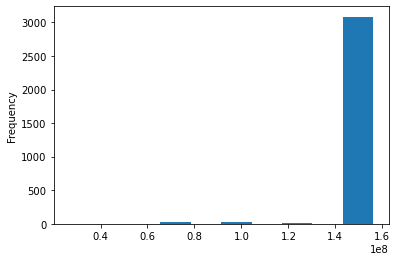

In [7]:
plant1_sum.TOTAL_YIELD.plot.hist()

### Cleaning data

In [8]:
plant1_sum.DATE_TIME.dtypes

dtype('O')

In [9]:
plant1_sum.DATE_TIME = pd.to_datetime(plant1_sum.DATE_TIME)
plant1_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    3158 non-null   datetime64[ns]
 1   DC_POWER     3158 non-null   float64       
 2   AC_POWER     3158 non-null   float64       
 3   DAILY_YIELD  3158 non-null   float64       
 4   TOTAL_YIELD  3158 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 123.5 KB


In [10]:
plant1_sum.tail(20)

DATE_TIME  DC_POWER  AC_POWER    DAILY_YIELD  TOTAL_YIELD
3138 2020-05-31 19:00:00       0.0       0.0  131229.000000  153519480.0
3139 2020-05-31 19:15:00       0.0       0.0  125291.000000  147056241.0
3140 2020-05-31 19:30:00       0.0       0.0  125291.000000  147056241.0
3141 2020-05-31 19:45:00       0.0       0.0  125291.000000  147056241.0
3142 2020-05-31 20:00:00       0.0       0.0  125291.000000  147056241.0
3143 2020-05-31 20:15:00       0.0       0.0  125291.000000  147056241.0
3144 2020-05-31 20:30:00       0.0       0.0  125291.000000  147056241.0
3145 2020-05-31 20:45:00       0.0       0.0  125291.000000  153519480.0
3146 2020-05-31 21:00:00       0.0       0.0  125291.000000  153519480.0
3147 2020-05-31 21:15:00       0.0       0.0  125291.000000  153519480.0
3148 2020-05-31 21:30:00       0.0       0.0  125291.000000  153519480.0
3149 2020-05-31 21:45:00       0.0       0.0  125291.000000  153519480.0
3150 2020-05-31 22:00:00       0.0       0.0  125291.000000  153519480.0
3151 2020-05-31 22:15:00       0.0       0.0  125291.000000  153519480.0
3152 2020-05-31 22:30:00       0.0       0.0  125291.000000  153519480.0
3153 2020-05-31 22:45:00       0.0       0.0  125291.000000  153519480.0
3154 2020-05-31 23:00:00       0.0       0.0  125291.000000  153519480.0
3155 2020-05-31 23:15:00       0.0       0.0  125291.000000  153519480.0
3156 2020-05-31 23:30:00       0.0       0.0  125291.000000  153519480.0
3157 2020-05-31 23:45:00       0.0       0.0  113737.142857  153519480.0

In [11]:
plant1_sum['Year'] = plant1_sum.DATE_TIME.dt.year
plant1_sum['Month'] = plant1_sum.DATE_TIME.dt.month
plant1_sum['Day'] = plant1_sum.DATE_TIME.dt.day
plant1_sum['Hour'] = plant1_sum.DATE_TIME.dt.hour
plant1_sum['Minute'] = plant1_sum.DATE_TIME.dt.minute
plant1_sum['DayOfWeek'] = plant1_sum.DATE_TIME.dt.dayofweek
plant1_sum['DayOfYear'] = plant1_sum.DATE_TIME.dt.dayofyear
plant1_sum['time'] = plant1_sum['DATE_TIME'].dt.time
plant1_sum['date'] = plant1_sum['DATE_TIME'].dt.date

In [12]:
plant1_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    3158 non-null   datetime64[ns]
 1   DC_POWER     3158 non-null   float64       
 2   AC_POWER     3158 non-null   float64       
 3   DAILY_YIELD  3158 non-null   float64       
 4   TOTAL_YIELD  3158 non-null   float64       
 5   Year         3158 non-null   int64         
 6   Month        3158 non-null   int64         
 7   Day          3158 non-null   int64         
 8   Hour         3158 non-null   int64         
 9   Minute       3158 non-null   int64         
 10  DayOfWeek    3158 non-null   int64         
 11  DayOfYear    3158 non-null   int64         
 12  time         3158 non-null   object        
 13  date         3158 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(7), object(2)
memory usage: 345.5+ KB


In [13]:
plant1_sum.drop('DATE_TIME', axis=1, inplace=True)
plant1_sum

DC_POWER  AC_POWER    DAILY_YIELD  TOTAL_YIELD  Year  Month  Day  Hour  \
0          0.0       0.0    5407.250000  153519480.0  2020      1    6     0   
1          0.0       0.0       0.000000  153519480.0  2020      1    6     0   
2          0.0       0.0       0.000000  153519480.0  2020      1    6     0   
3          0.0       0.0       0.000000  153519480.0  2020      1    6     0   
4          0.0       0.0       0.000000  153519480.0  2020      1    6     1   
...        ...       ...            ...          ...   ...    ...  ...   ...   
3153       0.0       0.0  125291.000000  153519480.0  2020      5   31    22   
3154       0.0       0.0  125291.000000  153519480.0  2020      5   31    23   
3155       0.0       0.0  125291.000000  153519480.0  2020      5   31    23   
3156       0.0       0.0  125291.000000  153519480.0  2020      5   31    23   
3157       0.0       0.0  113737.142857  153519480.0  2020      5   31    23   

      Minute  DayOfWeek  DayOfYear      time        date  
0          0          0          6  00:00:00  2020-01-06  
1         15          0          6  00:15:00  2020-01-06  
2         30          0          6  00:30:00  2020-01-06  
3         45          0          6  00:45:00  2020-01-06  
4          0          0          6  01:00:00  2020-01-06  
...      ...        ...        ...       ...         ...  
3153      45          6        152  22:45:00  2020-05-31  
3154       0          6        152  23:00:00  2020-05-31  
3155      15          6        152  23:15:00  2020-05-31  
3156      30          6        152  23:30:00  2020-05-31  
3157      45          6        152  23:45:00  2020-05-31  

[3158 rows x 13 columns]

### DC Power

In [14]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [15]:
plt.style.use(['seaborn-darkgrid'])

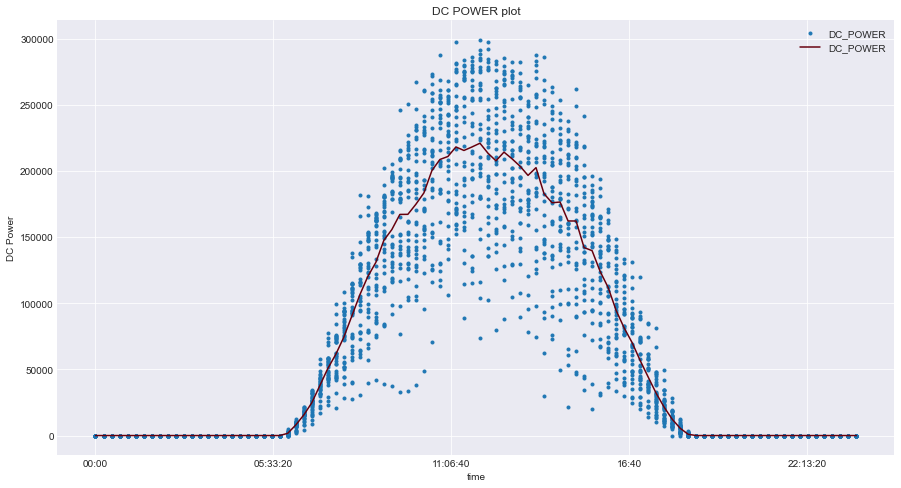

In [16]:
plant1_sum.plot(x='time', y='DC_POWER', style='.', figsize=(15, 8))
plant1_sum.groupby('time')['DC_POWER'].agg(
    'mean').plot(legend=True, colormap='Reds_r')
plt.ylabel('DC Power')
plt.title('DC POWER plot')
plt.show()

* dari grafik diatas dapat dilihat produksi DC_POWER dari plant 1 per 24 jam

In [17]:
calendar_dc = plant1_sum.pivot_table(
    values='DC_POWER', index='time', columns='date')
calendar_dc

date      2020-01-06  2020-02-06  2020-03-06  2020-04-06  2020-05-06  \
time                                                                   
00:00:00         0.0         0.0         0.0         0.0         0.0   
00:15:00         0.0         0.0         0.0         0.0         0.0   
00:30:00         0.0         0.0         0.0         0.0         0.0   
00:45:00         0.0         0.0         0.0         0.0         0.0   
01:00:00         0.0         0.0         0.0         0.0         0.0   
...              ...         ...         ...         ...         ...   
22:45:00         0.0         0.0         0.0         0.0         0.0   
23:00:00         0.0         0.0         0.0         0.0         0.0   
23:15:00         0.0         0.0         0.0         0.0         0.0   
23:30:00         0.0         0.0         0.0         0.0         0.0   
23:45:00         0.0         0.0         0.0         0.0         0.0   

date      2020-05-15  2020-05-16  2020-05-17  2020-05-18  2020-05-19  ...  \
time                                                                  ...   
00:00:00         0.0         NaN         0.0         0.0         0.0  ...   
00:15:00         0.0         NaN         0.0         0.0         0.0  ...   
00:30:00         0.0         NaN         0.0         0.0         0.0  ...   
00:45:00         0.0         NaN         0.0         0.0         0.0  ...   
01:00:00         0.0         NaN         0.0         0.0         0.0  ...   
...              ...         ...         ...         ...         ...  ...   
22:45:00         0.0         0.0         0.0         0.0         0.0  ...   
23:00:00         0.0         0.0         0.0         0.0         0.0  ...   
23:15:00         NaN         0.0         0.0         0.0         0.0  ...   
23:30:00         NaN         0.0         0.0         0.0         0.0  ...   
23:45:00         NaN         0.0         0.0         0.0         0.0  ...   

date      2020-06-14  2020-06-15  2020-06-16  2020-06-17  2020-07-06  \
time                                                                   
00:00:00         0.0         0.0         0.0         0.0         0.0   
00:15:00         0.0         0.0         0.0         0.0         0.0   
00:30:00         0.0         0.0         0.0         0.0         0.0   
00:45:00         0.0         0.0         0.0         0.0         0.0   
01:00:00         0.0         0.0         0.0         0.0         0.0   
...              ...         ...         ...         ...         ...   
22:45:00         0.0         0.0         0.0         0.0         0.0   
23:00:00         0.0         0.0         0.0         0.0         0.0   
23:15:00         0.0         0.0         0.0         0.0         0.0   
23:30:00         0.0         0.0         0.0         0.0         0.0   
23:45:00         0.0         0.0         0.0         0.0         0.0   

date      2020-08-06  2020-09-06  2020-10-06  2020-11-06  2020-12-06  
time                                                                  
00:00:00         0.0         0.0         0.0         0.0         0.0  
00:15:00         0.0         0.0         0.0         0.0         0.0  
00:30:00         0.0         0.0         0.0         0.0         0.0  
00:45:00         0.0         0.0         0.0         0.0         0.0  
01:00:00         0.0         0.0         0.0         0.0         0.0  
...              ...         ...         ...         ...         ...  
22:45:00         0.0         0.0         0.0         0.0         0.0  
23:00:00         0.0         0.0         0.0         0.0         0.0  
23:15:00         0.0         0.0         0.0         0.0         0.0  
23:30:00         0.0         0.0         0.0         0.0         0.0  
23:45:00         0.0         0.0         0.0         0.0         0.0  

[96 rows x 34 columns]

In [18]:
# define function to multi plot

def multi_plot(data=None, row=None, col=None, title='DC Power'):
    cols = data.columns  # take all column
    gp = plt.figure(figsize=(20, 20))

    gp.subplots_adjust(wspace=0.2, hspace=0.8)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row, col, i)
        data[cols[i-1]].plot(ax=ax, style='b.')
        ax.set_title('{} {}'.format(title, cols[i-1]))

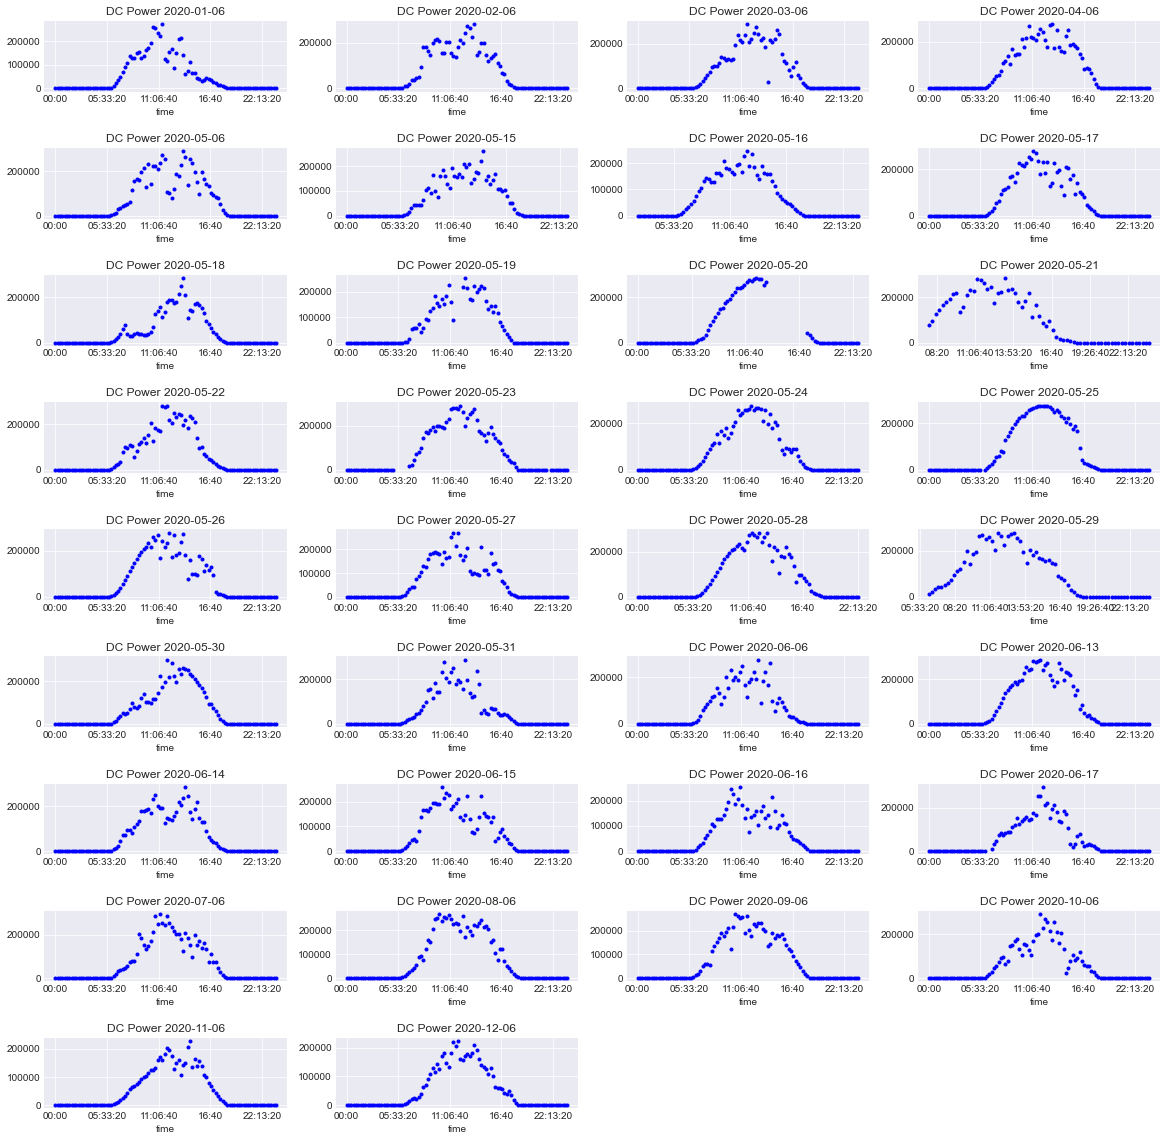

In [19]:
multi_plot(data=calendar_dc, row=9, col=4)

In [20]:
plant1_sum

DC_POWER  AC_POWER    DAILY_YIELD  TOTAL_YIELD  Year  Month  Day  Hour  \
0          0.0       0.0    5407.250000  153519480.0  2020      1    6     0   
1          0.0       0.0       0.000000  153519480.0  2020      1    6     0   
2          0.0       0.0       0.000000  153519480.0  2020      1    6     0   
3          0.0       0.0       0.000000  153519480.0  2020      1    6     0   
4          0.0       0.0       0.000000  153519480.0  2020      1    6     1   
...        ...       ...            ...          ...   ...    ...  ...   ...   
3153       0.0       0.0  125291.000000  153519480.0  2020      5   31    22   
3154       0.0       0.0  125291.000000  153519480.0  2020      5   31    23   
3155       0.0       0.0  125291.000000  153519480.0  2020      5   31    23   
3156       0.0       0.0  125291.000000  153519480.0  2020      5   31    23   
3157       0.0       0.0  113737.142857  153519480.0  2020      5   31    23   

      Minute  DayOfWeek  DayOfYear      time        date  
0          0          0          6  00:00:00  2020-01-06  
1         15          0          6  00:15:00  2020-01-06  
2         30          0          6  00:30:00  2020-01-06  
3         45          0          6  00:45:00  2020-01-06  
4          0          0          6  01:00:00  2020-01-06  
...      ...        ...        ...       ...         ...  
3153      45          6        152  22:45:00  2020-05-31  
3154       0          6        152  23:00:00  2020-05-31  
3155      15          6        152  23:15:00  2020-05-31  
3156      30          6        152  23:30:00  2020-05-31  
3157      45          6        152  23:45:00  2020-05-31  

[3158 rows x 13 columns]

In [21]:
daily_dc = plant1_sum.groupby('date')['DC_POWER'].agg('sum')
daily_dc

date
2020-01-06    5.210134e+06
2020-02-06    6.631811e+06
2020-03-06    6.732591e+06
2020-04-06    7.321031e+06
2020-05-06    6.898474e+06
2020-05-15    5.627239e+06
2020-05-16    5.806138e+06
2020-05-17    6.759595e+06
2020-05-18    4.812549e+06
2020-05-19    5.437955e+06
2020-05-20    5.375586e+06
2020-05-21    6.781068e+06
2020-05-22    6.420685e+06
2020-05-23    7.630217e+06
2020-05-24    7.160354e+06
2020-05-25    7.898965e+06
2020-05-26    7.052705e+06
2020-05-27    5.985527e+06
2020-05-28    7.501395e+06
2020-05-29    7.295130e+06
2020-05-30    6.502313e+06
2020-05-31    5.378553e+06
2020-06-06    5.730939e+06
2020-06-13    7.593776e+06
2020-06-14    6.350495e+06
2020-06-15    6.055536e+06
2020-06-16    5.572501e+06
2020-06-17    5.317780e+06
2020-07-06    6.876444e+06
2020-08-06    7.470115e+06
2020-09-06    7.234009e+06
2020-10-06    5.784040e+06
2020-11-06    5.045679e+06
2020-12-06    5.222354e+06
Name: DC_POWER, dtype: float64

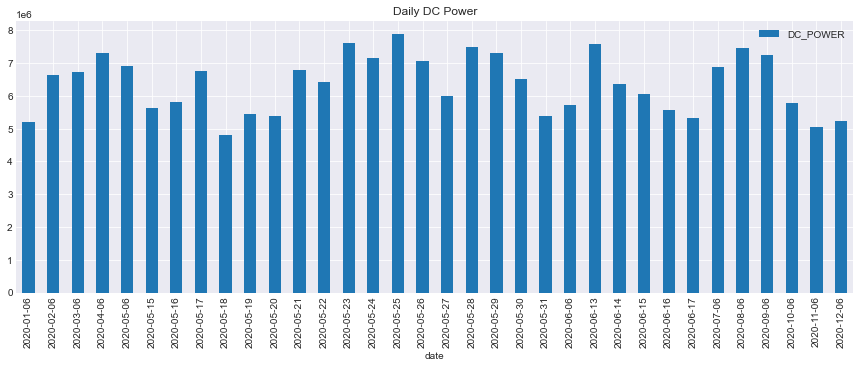

In [22]:
daily_dc.plot.bar(figsize=(15, 5), legend=True)
plt.title('Daily DC Power')
plt.show()

### Daily Yield

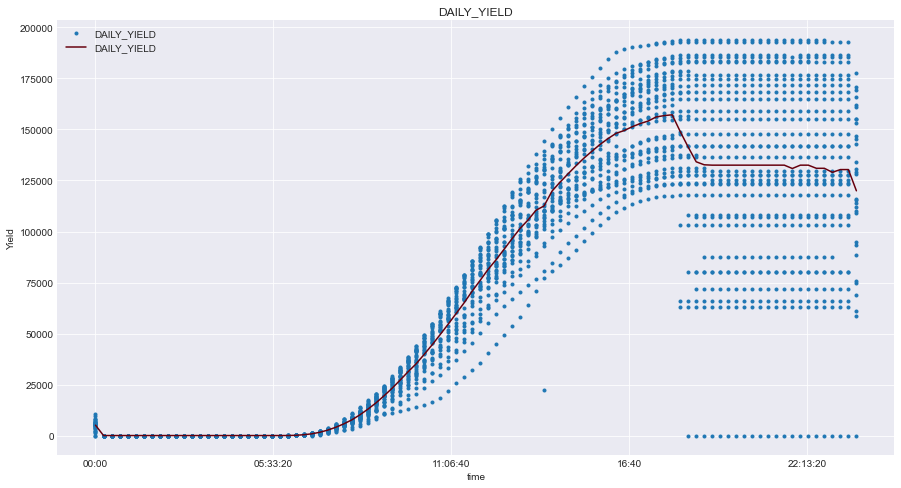

In [90]:
plant1_sum.plot(x='time', y='DAILY_YIELD', style='.', figsize=(15, 8))
plant1_sum.groupby('time')['DAILY_YIELD'].agg(
    'mean').plot(legend=True, colormap='Reds_r')
plt.ylabel('Yield')
plt.title('DAILY_YIELD')
plt.show()

In [24]:
daily_yield = plant1_sum.pivot_table(
    values='DAILY_YIELD', index='time', columns='date')
daily_yield

date      2020-01-06     2020-02-06     2020-03-06    2020-04-06  \
time                                                               
00:00:00    5407.250    1676.285714    1063.714286   9461.553572   
00:15:00       0.000       0.000000       0.000000      0.000000   
00:30:00       0.000       0.000000       0.000000      0.000000   
00:45:00       0.000       0.000000       0.000000      0.000000   
01:00:00       0.000       0.000000       0.000000      0.000000   
...              ...            ...            ...           ...   
22:45:00  127458.000  103099.000000  171562.000000  80142.000000   
23:00:00  127458.000  103099.000000  171562.000000  80142.000000   
23:15:00  127458.000  103099.000000  171562.000000  80142.000000   
23:30:00  127458.000  103099.000000  171562.000000  80142.000000   
23:45:00  115927.125   88402.750000  154951.428571  75878.000000   

date         2020-05-06  2020-05-15  2020-05-16     2020-05-17     2020-05-18  \
time                                                                            
00:00:00    5449.964286         0.0         NaN    4908.000000    5682.250000   
00:15:00       0.000000         0.0         NaN       0.000000       0.000000   
00:30:00       0.000000         0.0         NaN       0.000000       0.000000   
00:45:00       0.000000         0.0         NaN       0.000000       0.000000   
01:00:00       0.000000         0.0         NaN       0.000000       0.000000   
...                 ...         ...         ...            ...            ...   
22:45:00  107249.000000     87463.0    142114.0  165106.000000  117738.000000   
23:00:00  107249.000000     87463.0    142114.0  165106.000000  117738.000000   
23:15:00  107249.000000         NaN    142114.0  165106.000000  117738.000000   
23:30:00  107249.000000         NaN    142114.0  165106.000000  117738.000000   
23:45:00   93497.642857         NaN    130779.0  155005.285714  108873.428571   

date         2020-05-19  ...     2020-06-14  2020-06-15     2020-06-16  \
time                     ...                                             
00:00:00    6570.767857  ...   10641.339286    5480.000    8088.660714   
00:15:00       0.000000  ...       0.000000       0.000       0.000000   
00:30:00       0.000000  ...       0.000000       0.000       0.000000   
00:45:00       0.000000  ...       0.000000       0.000       0.000000   
01:00:00       0.000000  ...       0.000000       0.000       0.000000   
...                 ...  ...            ...         ...            ...   
22:45:00  123475.000000  ...  155054.000000  147615.000  136429.000000   
23:00:00  123475.000000  ...  155054.000000  147615.000  136429.000000   
23:15:00  123475.000000  ...  155054.000000  147615.000  136429.000000   
23:30:00  123475.000000  ...  155054.000000  147615.000  136429.000000   
23:45:00  111820.428571  ...  142682.392857  146773.625  134079.375000   

date         2020-06-17     2020-07-06     2020-08-06     2020-09-06  \
time                                                                   
00:00:00    6955.232143    3313.857143    3853.696429    7767.642857   
00:15:00       0.000000       0.000000       0.000000       0.000000   
00:30:00       0.000000       0.000000       0.000000       0.000000   
00:45:00       0.000000       0.000000       0.000000       0.000000   
01:00:00       0.000000       0.000000       0.000000       0.000000   
...                 ...            ...            ...            ...   
22:45:00  129571.000000  168197.000000  182943.000000  176854.000000   
23:00:00  129571.000000  168197.000000  182943.000000  176854.000000   
23:15:00  129571.000000  168197.000000  182943.000000  176854.000000   
23:30:00  129571.000000  168197.000000  182943.000000  176854.000000   
23:45:00  127962.767857  153216.500000  165866.875000  162100.714285   

date         2020-10-06     2020-11-06     2020-12-06  
time                                                   
00:00:00    6229.464286    7990.500000    4212.50

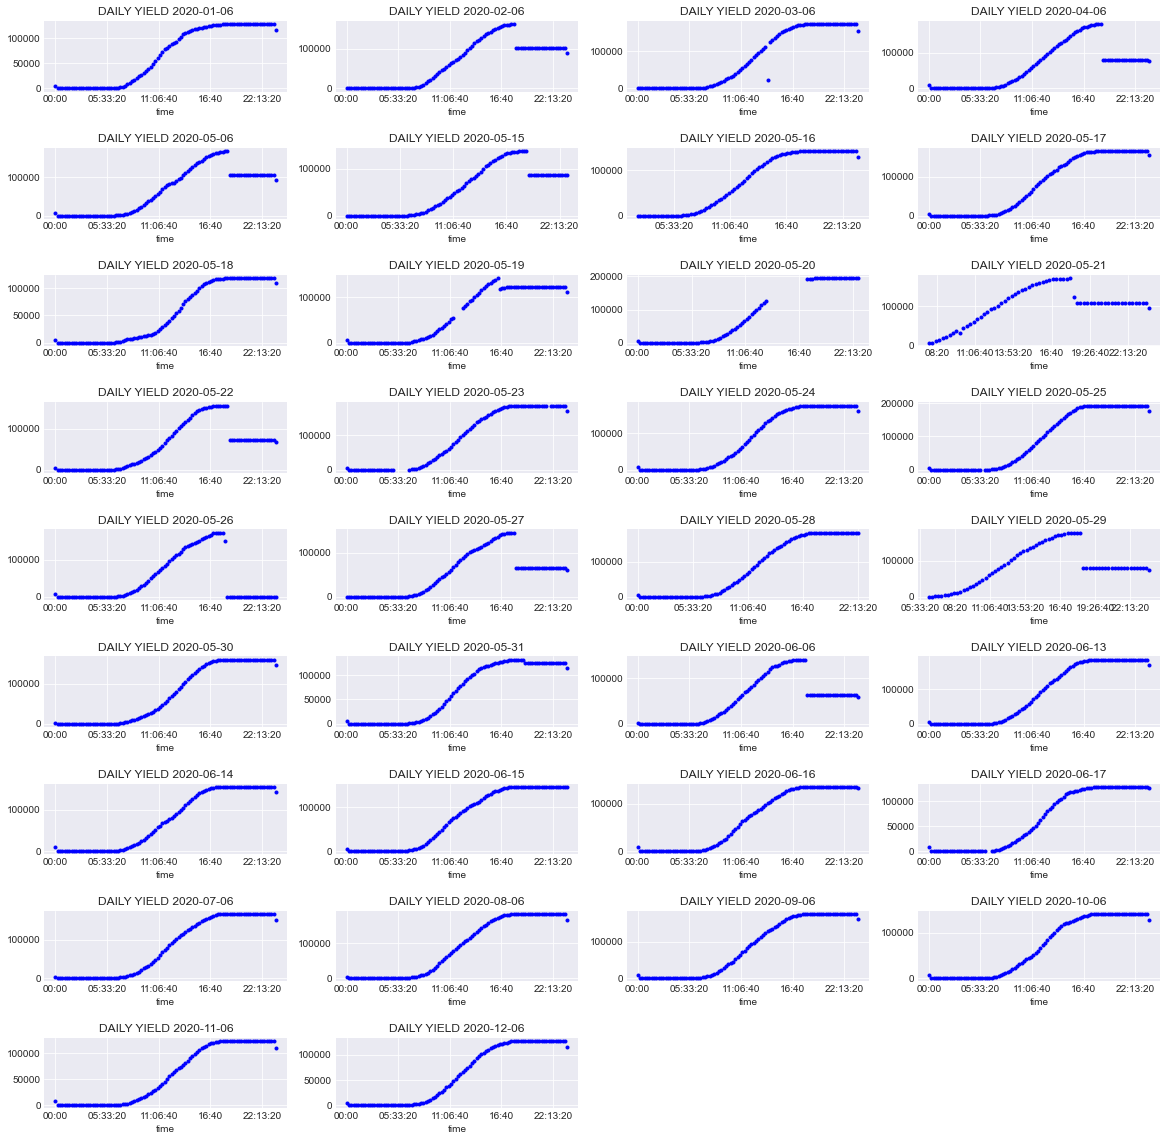

In [25]:
multi_plot(data=daily_yield, row=9, col=4, title='DAILY YIELD')

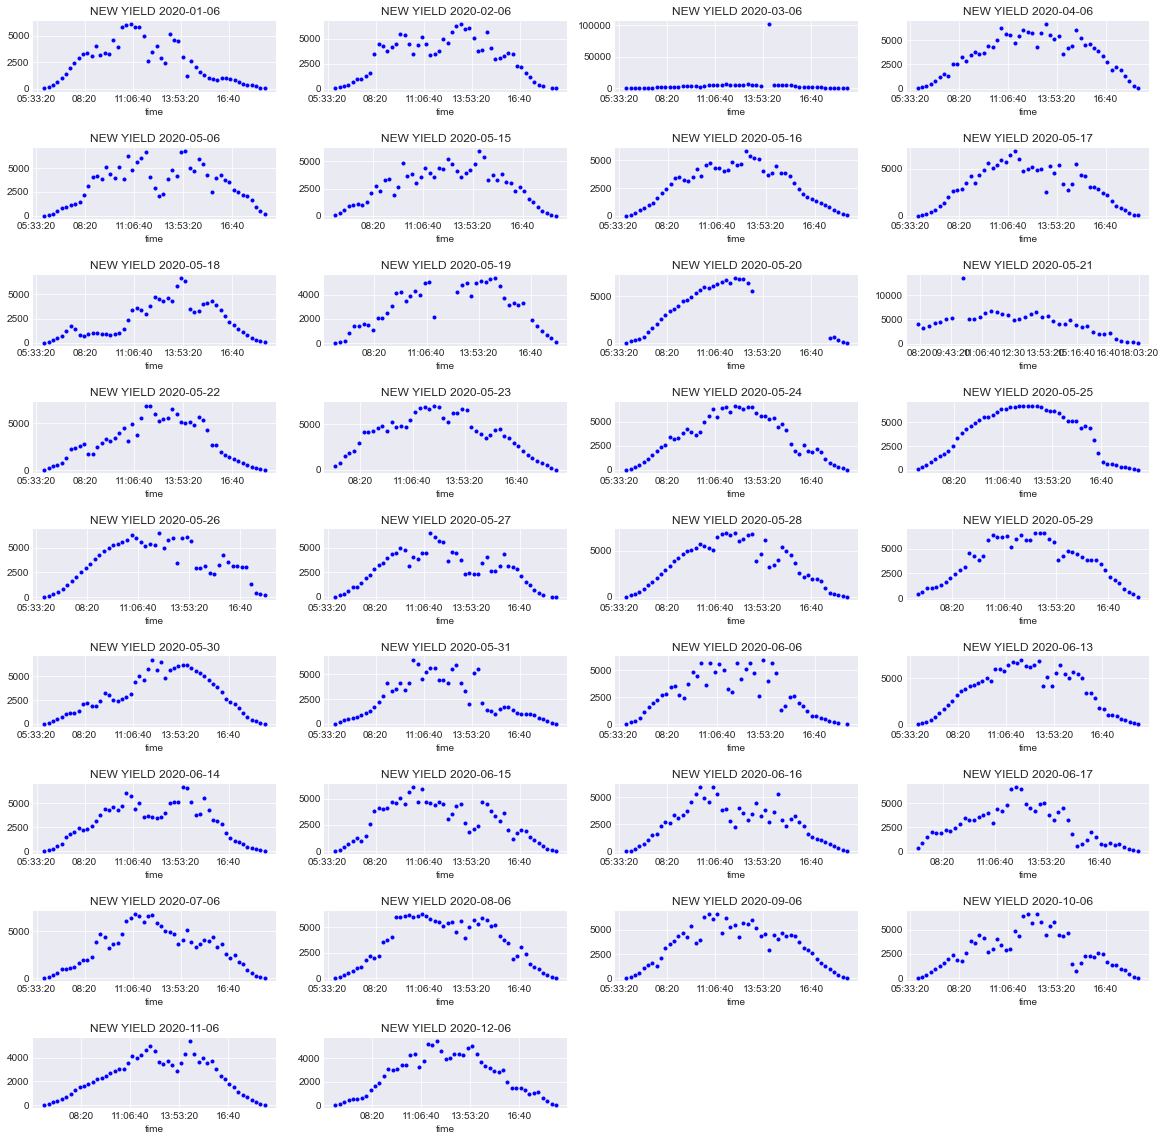

In [26]:
multi_plot(data=daily_yield.diff()[
           daily_yield.diff() > 0], row=9, col=4, title='NEW YIELD')

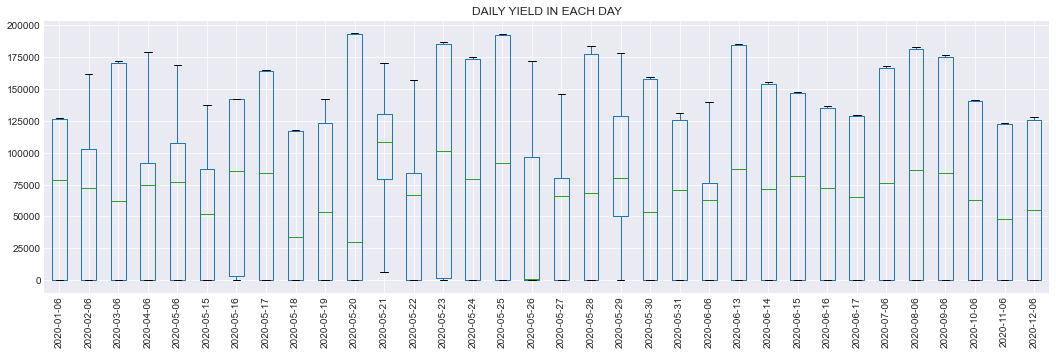

In [27]:
daily_yield.boxplot(figsize=(18, 5), rot=90)
plt.title('DAILY YIELD IN EACH DAY')
plt.show()

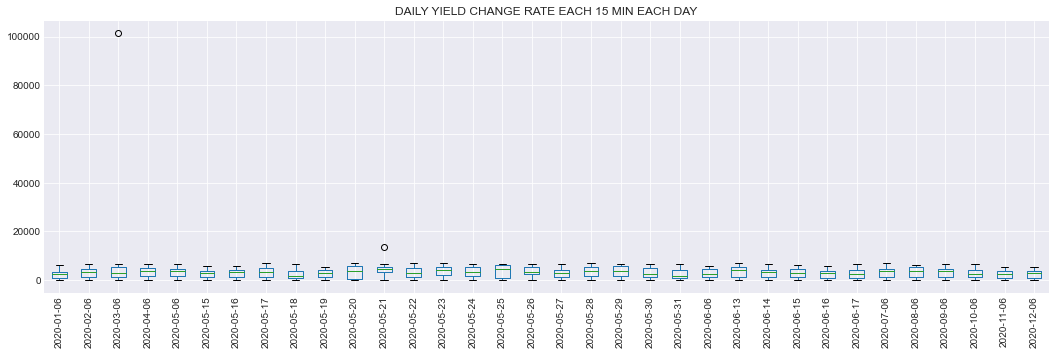

In [28]:
daily_yield.diff()[daily_yield.diff() > 0].boxplot(figsize=(18, 5), rot=90)
plt.title('DAILY YIELD CHANGE RATE EACH 15 MIN EACH DAY')
plt.show()

In [29]:
d_yield = plant1_sum.groupby('date')['DAILY_YIELD'].agg('sum')
d_yield

date
2020-01-06    6.387988e+06
2020-02-06    6.224743e+06
2020-03-06    7.677981e+06
2020-04-06    6.091402e+06
2020-05-06    6.384127e+06
2020-05-15    5.053591e+06
2020-05-16    6.699905e+06
2020-05-17    7.804065e+06
2020-05-18    5.130290e+06
2020-05-19    5.896321e+06
2020-05-20    5.612536e+06
2020-05-21    6.627303e+06
2020-05-22    5.555931e+06
2020-05-23    8.468993e+06
2020-05-24    8.181251e+06
2020-05-25    9.053215e+06
2020-05-26    4.376113e+06
2020-05-27    5.127007e+06
2020-05-28    7.578132e+06
2020-05-29    6.103425e+06
2020-05-30    7.050152e+06
2020-05-31    6.214020e+06
2020-06-06    5.076817e+06
2020-06-13    8.705923e+06
2020-06-14    7.240643e+06
2020-06-15    7.137433e+06
2020-06-16    6.512585e+06
2020-06-17    6.138883e+06
2020-07-06    7.747108e+06
2020-08-06    8.505252e+06
2020-09-06    8.260297e+06
2020-10-06    6.679794e+06
2020-11-06    5.538094e+06
2020-12-06    5.848817e+06
Name: DAILY_YIELD, dtype: float64

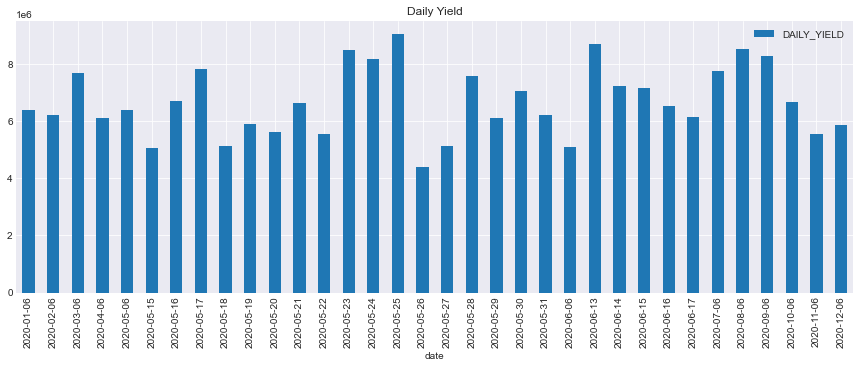

In [30]:
d_yield.plot.bar(figsize=(15, 5), legend=True)
plt.title('Daily Yield')
plt.show()

## Plant 1 : Weather Sensor Data

### Ambient Temperature

In [31]:
sensor_data = pd.read_csv(
    'solar_data/Plant_1_Weather_Sensor_Data.csv', low_memory=False)
sensor_data

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0     2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1     2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2     2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3     2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4     2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   
...                   ...       ...              ...                  ...   
3177  2020-06-17 22:45:00   4135001  HmiyD2TTLFNqkNe            22.150570   
3178  2020-06-17 23:00:00   4135001  HmiyD2TTLFNqkNe            22.129816   
3179  2020-06-17 23:15:00   4135001  HmiyD2TTLFNqkNe            22.008275   
3180  2020-06-17 23:30:00   4135001  HmiyD2TTLFNqkNe            21.969495   
3181  2020-06-17 23:45:00   4135001  HmiyD2TTLFNqkNe            21.909288   

      MODULE_TEMPERATURE  IRRADIATION  
0              22.857507          0.0  
1              22.761668          0.0  
2              22.592306          0.0  
3              22.360852          0.0  
4              22.165423          0.0  
...                  ...          ...  
3177           21.480377          0.0  
3178           21.389024          0.0  
3179           20.709211          0.0  
3180           20.734963          0.0  
3181           20.427972          0.0  

[3182 rows x 6 columns]

In [32]:
sensor_data_sum = sensor_data.groupby('DATE_TIME')[
    ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']].agg('sum')
sensor_data_sum.reset_index(inplace=True)
sensor_data_sum

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0     2020-05-15 00:00:00            25.184316           22.857507   
1     2020-05-15 00:15:00            25.084589           22.761668   
2     2020-05-15 00:30:00            24.935753           22.592306   
3     2020-05-15 00:45:00            24.846130           22.360852   
4     2020-05-15 01:00:00            24.621525           22.165423   
...                   ...                  ...                 ...   
3177  2020-06-17 22:45:00            22.150570           21.480377   
3178  2020-06-17 23:00:00            22.129816           21.389024   
3179  2020-06-17 23:15:00            22.008275           20.709211   
3180  2020-06-17 23:30:00            21.969495           20.734963   
3181  2020-06-17 23:45:00            21.909288           20.427972   

      IRRADIATION  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
3177          0.0  
3178          0.0  
3179          0.0  
3180          0.0  
3181          0.0  

[3182 rows x 4 columns]

In [33]:
sensor_data_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   AMBIENT_TEMPERATURE  3182 non-null   float64
 2   MODULE_TEMPERATURE   3182 non-null   float64
 3   IRRADIATION          3182 non-null   float64
dtypes: float64(3), object(1)
memory usage: 99.6+ KB


In [34]:
sensor_data_sum['DATE_TIME'] = pd.to_datetime(sensor_data_sum['DATE_TIME'])
sensor_data_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   AMBIENT_TEMPERATURE  3182 non-null   float64       
 2   MODULE_TEMPERATURE   3182 non-null   float64       
 3   IRRADIATION          3182 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 99.6 KB


In [35]:
sensor_data_sum

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
0    2020-05-15 00:00:00            25.184316           22.857507          0.0
1    2020-05-15 00:15:00            25.084589           22.761668          0.0
2    2020-05-15 00:30:00            24.935753           22.592306          0.0
3    2020-05-15 00:45:00            24.846130           22.360852          0.0
4    2020-05-15 01:00:00            24.621525           22.165423          0.0
...                  ...                  ...                 ...          ...
3177 2020-06-17 22:45:00            22.150570           21.480377          0.0
3178 2020-06-17 23:00:00            22.129816           21.389024          0.0
3179 2020-06-17 23:15:00            22.008275           20.709211          0.0
3180 2020-06-17 23:30:00            21.969495           20.734963          0.0
3181 2020-06-17 23:45:00            21.909288           20.427972          0.0

[3182 rows x 4 columns]

In [36]:
sensor_data_sum['time'] = pd.to_datetime(sensor_data_sum['DATE_TIME']).dt.time
sensor_data_sum['date'] = pd.to_datetime(sensor_data_sum['DATE_TIME']).dt.date
sensor_data_sum

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0    2020-05-15 00:00:00            25.184316           22.857507   
1    2020-05-15 00:15:00            25.084589           22.761668   
2    2020-05-15 00:30:00            24.935753           22.592306   
3    2020-05-15 00:45:00            24.846130           22.360852   
4    2020-05-15 01:00:00            24.621525           22.165423   
...                  ...                  ...                 ...   
3177 2020-06-17 22:45:00            22.150570           21.480377   
3178 2020-06-17 23:00:00            22.129816           21.389024   
3179 2020-06-17 23:15:00            22.008275           20.709211   
3180 2020-06-17 23:30:00            21.969495           20.734963   
3181 2020-06-17 23:45:00            21.909288           20.427972   

      IRRADIATION      time        date  
0             0.0  00:00:00  2020-05-15  
1             0.0  00:15:00  2020-05-15  
2             0.0  00:30:00  2020-05-15  
3             0.0  00:45:00  2020-05-15  
4             0.0  01:00:00  2020-05-15  
...           ...       ...         ...  
3177          0.0  22:45:00  2020-06-17  
3178          0.0  23:00:00  2020-06-17  
3179          0.0  23:15:00  2020-06-17  
3180          0.0  23:30:00  2020-06-17  
3181          0.0  23:45:00  2020-06-17  

[3182 rows x 6 columns]

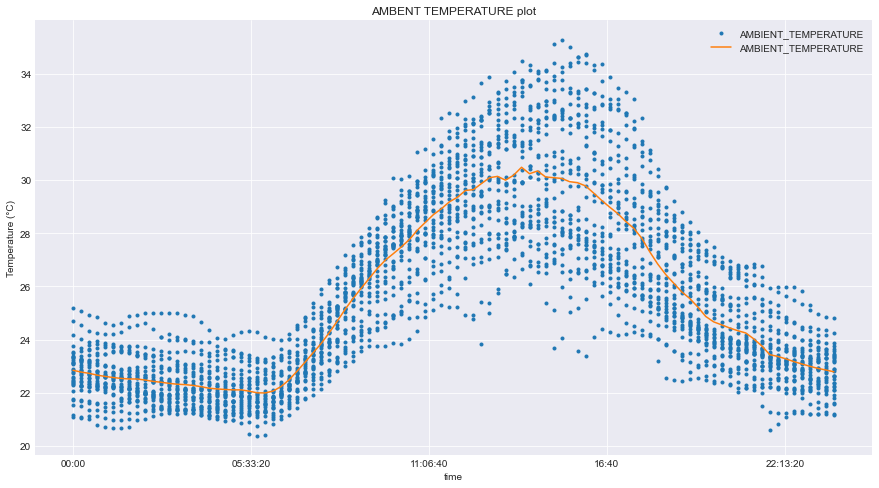

In [37]:
sensor_data_sum.plot(x='time', y='AMBIENT_TEMPERATURE',
                     style='.', figsize=(15, 8))
sensor_data_sum.groupby('time')['AMBIENT_TEMPERATURE'].agg(
    'mean').plot(legend=True)
plt.ylabel('Temperature (°C)')
plt.title('AMBENT TEMPERATURE plot')
plt.show()

In [38]:
daily_ambient = sensor_data_sum.pivot_table(
    values='AMBIENT_TEMPERATURE', index='time', columns='date')
daily_ambient

date      2020-05-15  2020-05-16  2020-05-17  2020-05-18  2020-05-19  \
time                                                                   
00:00:00   25.184316         NaN   24.170166   21.155691   22.610982   
00:15:00   25.084589         NaN   24.011531   21.041437   22.548998   
00:30:00   24.935753         NaN   23.894948   21.142068   22.553050   
00:45:00   24.846130         NaN   23.936809   21.137258   22.566217   
01:00:00   24.621525         NaN   23.879315   21.070793   22.625220   
...              ...         ...         ...         ...         ...   
22:45:00   22.057080   24.492981   21.315892   22.815780   23.393146   
23:00:00   22.236018   24.461625   21.220532   22.787469   23.230817   
23:15:00         NaN   24.392568   21.216575   22.856671   22.916650   
23:30:00         NaN   24.378021   21.273112   22.750576   22.787917   
23:45:00         NaN   24.249347   21.209418   22.621004   22.638493   

date      2020-05-20  2020-05-21  2020-05-22  2020-05-23  2020-05-24  ...  \
time                                                                  ...   
00:00:00   22.465285   23.497382   23.760593   21.719189   24.690680  ...   
00:15:00   22.255206   23.228943   23.675199   21.708895   24.538548  ...   
00:30:00   22.217139   23.204518   23.594094   21.620870   24.327403  ...   
00:45:00   22.222571         NaN   23.483291   21.575027   24.253961  ...   
01:00:00   22.191191         NaN   23.470836   21.458610   24.218199  ...   
...              ...         ...         ...         ...         ...  ...   
22:45:00   24.003129   24.002574   23.214526   25.338855   24.403691  ...   
23:00:00   23.830852   23.978326   22.361055   25.133763   24.308990  ...   
23:15:00   23.701162   23.922381   21.641128   24.969698   24.175543  ...   
23:30:00   23.589626   23.892236   21.564903   24.838093   24.169597  ...   
23:45:00   23.569009   23.856805   21.605520   24.818829   23.777932  ...   

date      2020-06-08  2020-06-09  2020-06-10  2020-06-11  2020-06-12  \
time                                                                   
00:00:00   23.316430   22.394712   22.842788   22.739368   22.799923   
00:15:00   23.257477   22.260339   22.775156   22.770774   22.691970   
00:30:00   23.057412   22.070467   22.709959   22.346177   22.757900   
00:45:00   22.822715   22.147101   22.707275   22.243848   22.682068   
01:00:00   22.663851   22.046031   22.628609   22.373763   22.602435   
...              ...         ...         ...         ...         ...   
22:45:00   23.170805   22.946915   22.014016   23.419015   22.599839   
23:00:00   23.115568   22.883195   22.087756   23.328575   22.504606   
23:15:00   22.929185   22.892314   22.247858   23.195113   22.398564   
23:30:00   22.616367   22.866815   22.409064   23.027635   22.145038   
23:45:00   22.369204   22.825907   22.643738   22.883351   21.820540   

date      2020-06-13  2020-06-14  2020-06-15  2020-06-16  2020-06-17  
time                                                                  
00:00:00   21.771613   22.309426   23.369126   23.103046   22.895672  
00:15:00   21.730046   22.283628   23.190212   22.853855   22.868416  
00:30:00   21.687068   22.417261   23.111739   22.701282   22.826764  
00:45:00   21.619232   22.447643   23.038019   22.620441   22.795615  
01:00:00   21.625968   22.339699   23.013379   22.585765   22.771452  
...              ...         ...         ...         ...         ...  
22:45:00   22.265993   23.522461   23.612832   22.872359   22.150570  
23:00:00   22.227169   23.386562   23.618848   22.962205   22.129816  
23:15:00   22.334206   23.331081   23.602976   22.947974   22.008275  
23:30:00   22.237394   23.444953   23.631051   22.925033   21.969495  
23:45:00   22.205029   23.418154   23.641211   22.892004   21.909288  

[96 rows x 34 columns]

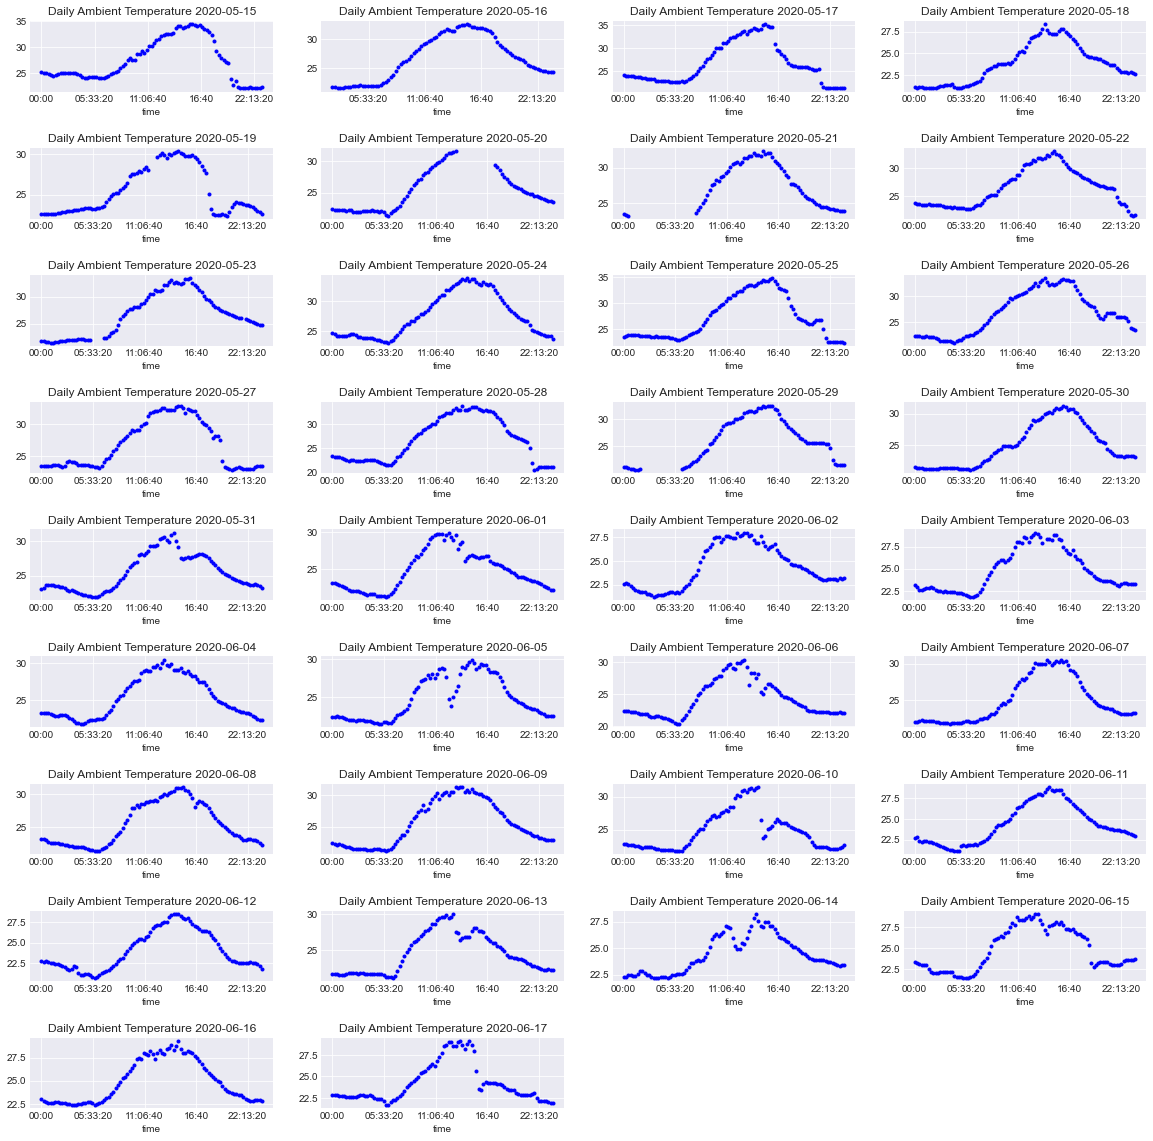

In [39]:
multi_plot(data=daily_ambient, row=9, col=4, title="Daily Ambient Temperature")

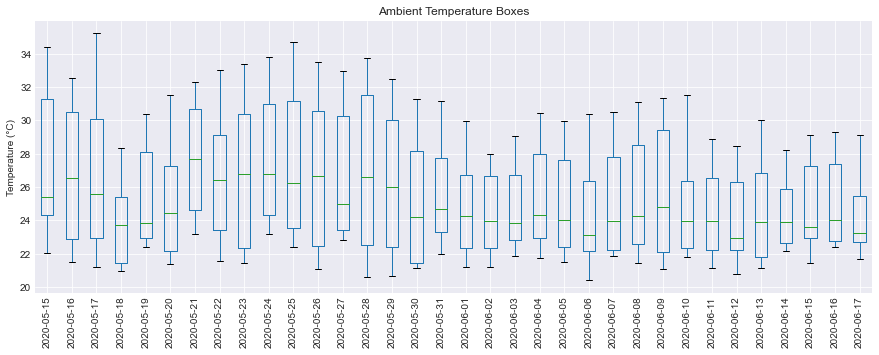

In [40]:
daily_ambient.boxplot(rot=90, figsize=(15, 5))
plt.ylabel('Temperature (°C)')
plt.title('Ambient Temperature Boxes')
plt.show()

In [41]:
sensor_data_sum

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0    2020-05-15 00:00:00            25.184316           22.857507   
1    2020-05-15 00:15:00            25.084589           22.761668   
2    2020-05-15 00:30:00            24.935753           22.592306   
3    2020-05-15 00:45:00            24.846130           22.360852   
4    2020-05-15 01:00:00            24.621525           22.165423   
...                  ...                  ...                 ...   
3177 2020-06-17 22:45:00            22.150570           21.480377   
3178 2020-06-17 23:00:00            22.129816           21.389024   
3179 2020-06-17 23:15:00            22.008275           20.709211   
3180 2020-06-17 23:30:00            21.969495           20.734963   
3181 2020-06-17 23:45:00            21.909288           20.427972   

      IRRADIATION      time        date  
0             0.0  00:00:00  2020-05-15  
1             0.0  00:15:00  2020-05-15  
2             0.0  00:30:00  2020-05-15  
3             0.0  00:45:00  2020-05-15  
4             0.0  01:00:00  2020-05-15  
...           ...       ...         ...  
3177          0.0  22:45:00  2020-06-17  
3178          0.0  23:00:00  2020-06-17  
3179          0.0  23:15:00  2020-06-17  
3180          0.0  23:30:00  2020-06-17  
3181          0.0  23:45:00  2020-06-17  

[3182 rows x 6 columns]

In [42]:
am_temp = sensor_data_sum.groupby('date')['AMBIENT_TEMPERATURE'].agg('mean')
len(am_temp)

34

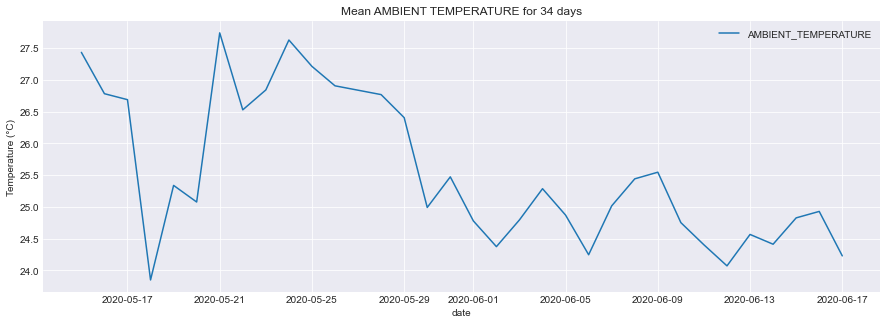

In [43]:
am_temp.plot(figsize=(15, 5), legend=True)
plt.title('Mean AMBIENT TEMPERATURE for 34 days')
plt.ylabel('Temperature (°C)')
plt.show()

In [44]:
am_temp.diff()

date
2020-05-15         NaN
2020-05-16   -0.650284
2020-05-17   -0.093811
2020-05-18   -2.835789
2020-05-19    1.487083
2020-05-20   -0.261239
2020-05-21    2.660793
2020-05-22   -1.210872
2020-05-23    0.312914
2020-05-24    0.785499
2020-05-25   -0.414959
2020-05-26   -0.305702
2020-05-27   -0.068986
2020-05-28   -0.069191
2020-05-29   -0.362492
2020-05-30   -1.412563
2020-05-31    0.481376
2020-06-01   -0.693085
2020-06-02   -0.404594
2020-06-03    0.420752
2020-06-04    0.490503
2020-06-05   -0.415554
2020-06-06   -0.623268
2020-06-07    0.768735
2020-06-08    0.425179
2020-06-09    0.104467
2020-06-10   -0.793268
2020-06-11   -0.349058
2020-06-12   -0.331031
2020-06-13    0.494350
2020-06-14   -0.153837
2020-06-15    0.414522
2020-06-16    0.101516
2020-06-17   -0.699201
Name: AMBIENT_TEMPERATURE, dtype: float64

In [45]:
am_temp_change = (am_temp.diff()/am_temp)*100
am_temp_change

date
2020-05-15          NaN
2020-05-16    -2.428198
2020-05-17    -0.351528
2020-05-18   -11.889635
2020-05-19     5.868980
2020-05-20    -1.041756
2020-05-21     9.592739
2020-05-22    -4.564730
2020-05-23     1.165866
2020-05-24     2.843425
2020-05-25    -1.525016
2020-05-26    -1.136251
2020-05-27    -0.257070
2020-05-28    -0.258501
2020-05-29    -1.372879
2020-05-30    -5.652236
2020-05-31     1.889781
2020-06-01    -2.797009
2020-06-02    -1.659880
2020-06-03     1.696878
2020-06-04     1.939809
2020-06-05    -1.670861
2020-06-06    -2.570456
2020-06-07     3.072963
2020-06-08     1.671216
2020-06-09     0.408942
2020-06-10    -3.204802
2020-06-11    -1.430364
2020-06-12    -1.375151
2020-06-13     2.012274
2020-06-14    -0.630149
2020-06-15     1.669615
2020-06-16     0.407221
2020-06-17    -2.885716
Name: AMBIENT_TEMPERATURE, dtype: float64

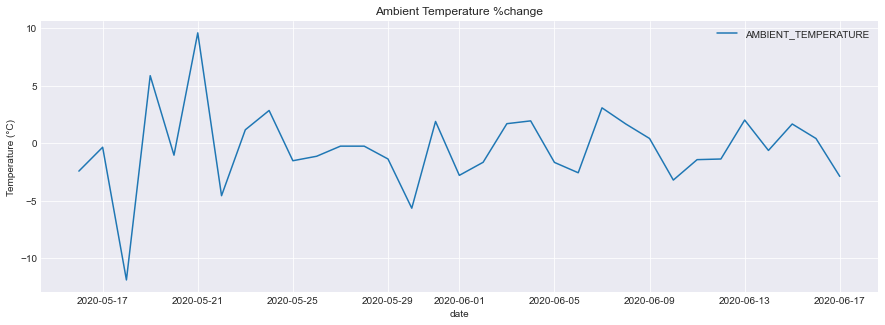

In [46]:
am_temp_change.plot(legend=True, figsize=(15, 5))
plt.title('Ambient Temperature %change')
plt.ylabel('Temperature (°C)')
plt.show()

### Module Temperature

In [47]:
sensor_data_sum

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0    2020-05-15 00:00:00            25.184316           22.857507   
1    2020-05-15 00:15:00            25.084589           22.761668   
2    2020-05-15 00:30:00            24.935753           22.592306   
3    2020-05-15 00:45:00            24.846130           22.360852   
4    2020-05-15 01:00:00            24.621525           22.165423   
...                  ...                  ...                 ...   
3177 2020-06-17 22:45:00            22.150570           21.480377   
3178 2020-06-17 23:00:00            22.129816           21.389024   
3179 2020-06-17 23:15:00            22.008275           20.709211   
3180 2020-06-17 23:30:00            21.969495           20.734963   
3181 2020-06-17 23:45:00            21.909288           20.427972   

      IRRADIATION      time        date  
0             0.0  00:00:00  2020-05-15  
1             0.0  00:15:00  2020-05-15  
2             0.0  00:30:00  2020-05-15  
3             0.0  00:45:00  2020-05-15  
4             0.0  01:00:00  2020-05-15  
...           ...       ...         ...  
3177          0.0  22:45:00  2020-06-17  
3178          0.0  23:00:00  2020-06-17  
3179          0.0  23:15:00  2020-06-17  
3180          0.0  23:30:00  2020-06-17  
3181          0.0  23:45:00  2020-06-17  

[3182 rows x 6 columns]

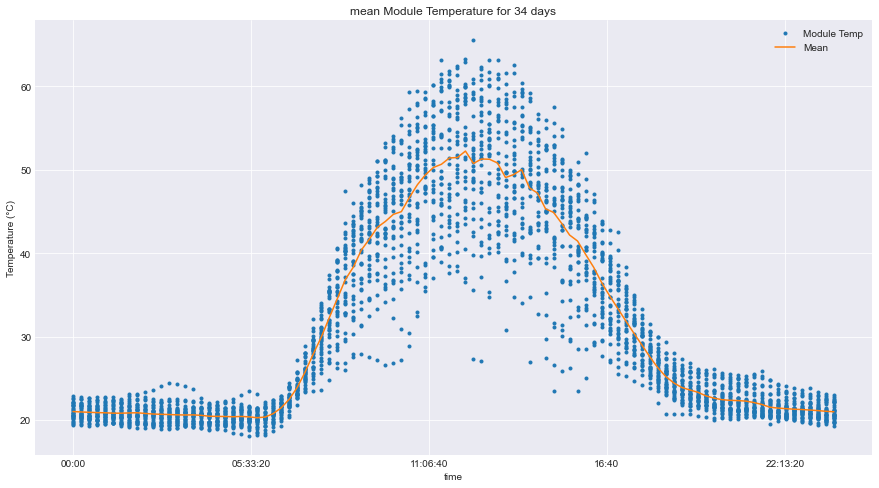

In [48]:
sensor_data_sum.plot(x='time', y='MODULE_TEMPERATURE',
                     style='.', figsize=(15, 8), label='Module Temp')
sensor_data_sum.groupby('time')['MODULE_TEMPERATURE'].agg(
    'mean').plot(label='Mean', legend=True)
plt.title('mean Module Temperature for 34 days')
plt.ylabel('Temperature (°C)')
plt.show()

In [49]:
daily_module_temp = sensor_data_sum.pivot_table(
    values='MODULE_TEMPERATURE', index='time', columns='date')
daily_module_temp

date      2020-05-15  2020-05-16  2020-05-17  2020-05-18  2020-05-19  \
time                                                                   
00:00:00   22.857507         NaN   21.631490   20.599400   20.609906   
00:15:00   22.761668         NaN   21.648279   20.475962   20.529877   
00:30:00   22.592306         NaN   21.488226   20.531305   20.487968   
00:45:00   22.360852         NaN   21.515645   20.533317   20.484894   
01:00:00   22.165423         NaN   21.539557   20.480648   20.586711   
...              ...         ...         ...         ...         ...   
22:45:00   21.072276   22.052697   20.690883   20.727924   21.106275   
23:00:00   21.241317   22.186352   20.590588   20.869314   20.721448   
23:15:00         NaN   22.202924   20.635392   21.085956   20.368068   
23:30:00         NaN   22.112622   20.632493   20.816386   20.326774   
23:45:00         NaN   21.814211   20.563115   20.638371   20.296448   

date      2020-05-20  2020-05-21  2020-05-22  2020-05-23  2020-05-24  ...  \
time                                                                  ...   
00:00:00   20.111123   20.584137   21.235205   20.471440   22.175581  ...   
00:15:00   20.110174   20.230347   21.192954   20.602031   21.885321  ...   
00:30:00   20.211192   20.179942   21.197518   20.551786   21.633982  ...   
00:45:00   20.012647         NaN   21.238489   20.511414   21.661316  ...   
01:00:00   20.036072         NaN   21.835552   20.405804   21.775757  ...   
...              ...         ...         ...         ...         ...  ...   
22:45:00   21.269993   21.370762   21.719092   22.979264   23.266341  ...   
23:00:00   21.024118   21.303056   20.863080   22.681325   23.166596  ...   
23:15:00   20.786399   21.196880   20.327665   22.494120   22.930408  ...   
23:30:00   20.572882   21.126923   20.206337   22.509726   22.926810  ...   
23:45:00   20.622103   21.155121   20.350039   22.467185   22.760667  ...   

date      2020-06-08  2020-06-09  2020-06-10  2020-06-11  2020-06-12  \
time                                                                   
00:00:00   22.217734   19.520929   20.787240   21.784452   20.528211   
00:15:00   22.076420   19.435152   20.823775   21.834870   20.668831   
00:30:00   21.816441   19.244576   20.856700   21.465226   21.138440   
00:45:00   21.345835   19.344568   20.973035   21.324750   20.969073   
01:00:00   20.767582   19.464695   20.859825   21.368697   20.842171   
...              ...         ...         ...         ...         ...   
22:45:00   21.031978   20.554199   20.856580   22.201027   21.062392   
23:00:00   20.764008   20.490859   20.840149   21.949691   20.695809   
23:15:00   20.342743   20.571364   20.934009   21.619792   20.527276   
23:30:00   20.058746   20.661737   21.169837   21.071305   19.895172   
23:45:00   19.744277   20.686540   21.613045   20.635208   19.340356   

date      2020-06-13  2020-06-14  2020-06-15  2020-06-16  2020-06-17  
time                                                                  
00:00:00   19.357530   21.285647   22.693622   22.078888   21.465773  
00:15:00   19.504081   20.812500   22.545046   21.676986   21.381974  
00:30:00   19.562803   20.841431   22.314376   21.311033   21.210284  
00:45:00   19.559182   20.779179   22.110986   20.884556   21.357155  
01:00:00   19.787058   20.416589   22.293188   20.697137   21.472048  
...              ...         ...         ...         ...         ...  
22:45:00   19.826632   21.420634   22.879323   20.925112   21.480377  
23:00:00   19.828367   21.151996   22.867519   21.606494   21.389024  
23:15:00   20.330839   21.470425   22.941127   21.326250   20.709211  
23:30:00   20.012465   22.455490   23.077228   21.164687   20.734963  
23:45:00   20.459212   22.447845   23.051286   21.216600   20.427972  

[96 rows x 34 columns]

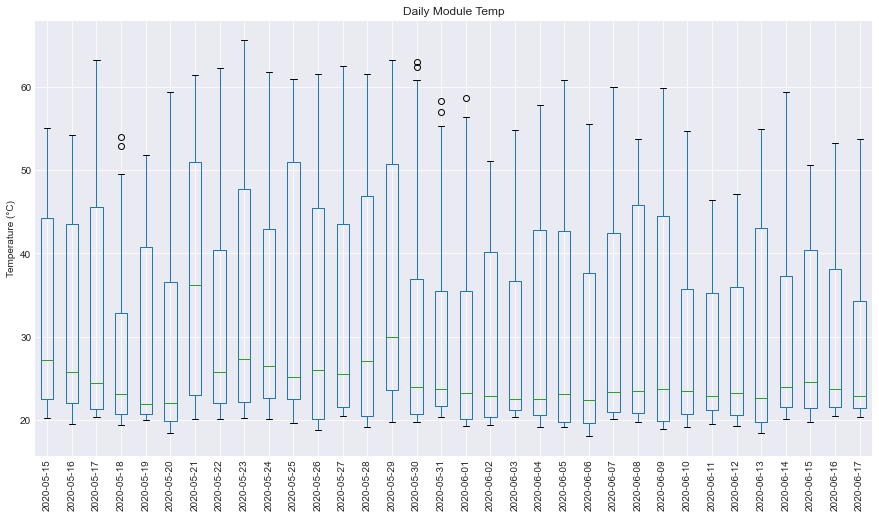

In [50]:
daily_module_temp.boxplot(figsize=(15, 8), rot=90)
plt.title('Daily Module Temp')
plt.ylabel('Temperature (°C)')
plt.show()

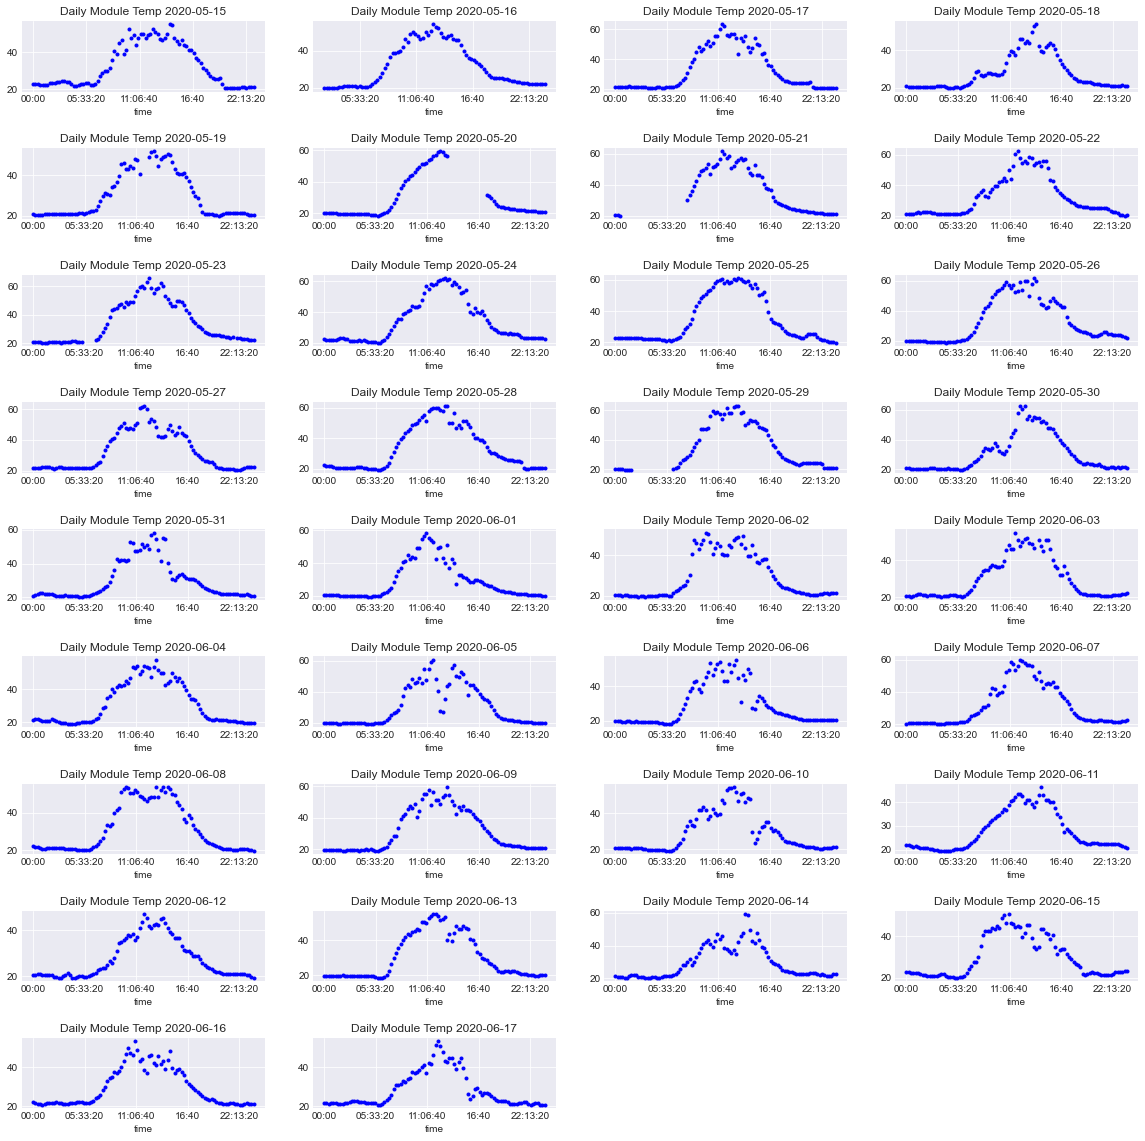

In [51]:
multi_plot(data=daily_module_temp, row=9, col=4, title='Daily Module Temp')

In [52]:
sensor_data_sum

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0    2020-05-15 00:00:00            25.184316           22.857507   
1    2020-05-15 00:15:00            25.084589           22.761668   
2    2020-05-15 00:30:00            24.935753           22.592306   
3    2020-05-15 00:45:00            24.846130           22.360852   
4    2020-05-15 01:00:00            24.621525           22.165423   
...                  ...                  ...                 ...   
3177 2020-06-17 22:45:00            22.150570           21.480377   
3178 2020-06-17 23:00:00            22.129816           21.389024   
3179 2020-06-17 23:15:00            22.008275           20.709211   
3180 2020-06-17 23:30:00            21.969495           20.734963   
3181 2020-06-17 23:45:00            21.909288           20.427972   

      IRRADIATION      time        date  
0             0.0  00:00:00  2020-05-15  
1             0.0  00:15:00  2020-05-15  
2             0.0  00:30:00  2020-05-15  
3             0.0  00:45:00  2020-05-15  
4             0.0  01:00:00  2020-05-15  
...           ...       ...         ...  
3177          0.0  22:45:00  2020-06-17  
3178          0.0  23:00:00  2020-06-17  
3179          0.0  23:15:00  2020-06-17  
3180          0.0  23:30:00  2020-06-17  
3181          0.0  23:45:00  2020-06-17  

[3182 rows x 6 columns]

In [53]:
mod_temp_mean = sensor_data_sum.groupby(
    'date')['MODULE_TEMPERATURE'].agg('mean')
mod_temp_mean

date
2020-05-15    32.582964
2020-05-16    31.858851
2020-05-17    32.740435
2020-05-18    27.814344
2020-05-19    29.725163
2020-05-20    29.332088
2020-05-21    37.186870
2020-05-22    32.478885
2020-05-23    34.801843
2020-05-24    33.978544
2020-05-25    34.533963
2020-05-26    33.473154
2020-05-27    32.420288
2020-05-28    33.503174
2020-05-29    36.304638
2020-05-30    30.816012
2020-05-31    30.160713
2020-06-01    28.961083
2020-06-02    29.448151
2020-06-03    29.998063
2020-06-04    31.221625
2020-06-05    30.582565
2020-06-06    28.802772
2020-06-07    31.497892
2020-06-08    31.621923
2020-06-09    31.515744
2020-06-10    29.202542
2020-06-11    27.880257
2020-06-12    27.585834
2020-06-13    30.481026
2020-06-14    29.421707
2020-06-15    29.927817
2020-06-16    29.555567
2020-06-17    28.374543
Name: MODULE_TEMPERATURE, dtype: float64

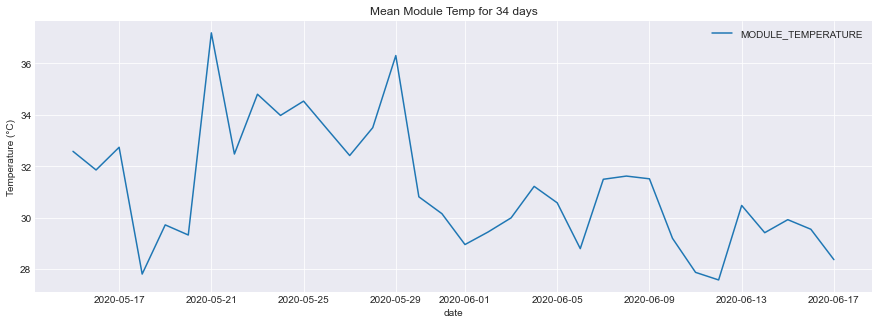

In [54]:
mod_temp_mean.plot(legend=True, figsize=(15, 5))
plt.title('Mean Module Temp for 34 days')
plt.ylabel('Temperature (°C)')
plt.show()

In [55]:
mod_temp_change = (mod_temp_mean.diff()/mod_temp_mean)*100
mod_temp_change

date
2020-05-15          NaN
2020-05-16    -2.272879
2020-05-17     2.692646
2020-05-18   -17.710615
2020-05-19     6.428290
2020-05-20    -1.340088
2020-05-21    21.122463
2020-05-22   -14.495527
2020-05-23     6.674813
2020-05-24    -2.422996
2020-05-25     1.608325
2020-05-26    -3.169133
2020-05-27    -3.247554
2020-05-28     3.232192
2020-05-29     7.716546
2020-05-30   -17.810955
2020-05-31    -2.172692
2020-06-01    -4.142213
2020-06-02     1.653984
2020-06-03     1.833158
2020-06-04     3.918956
2020-06-05    -2.089622
2020-06-06    -6.179240
2020-06-07     8.556509
2020-06-08     0.392229
2020-06-09    -0.336906
2020-06-10    -7.921234
2020-06-11    -4.742729
2020-06-12    -1.067299
2020-06-13     9.498341
2020-06-14    -3.600465
2020-06-15     1.691100
2020-06-16    -1.259491
2020-06-17    -4.162268
Name: MODULE_TEMPERATURE, dtype: float64

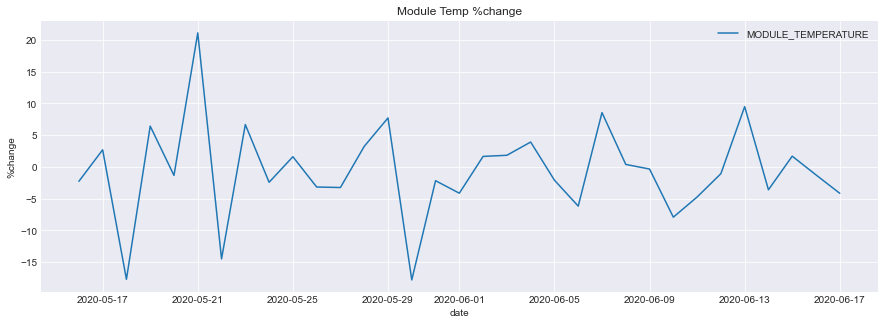

In [56]:
mod_temp_change.plot(legend=True, figsize=(15, 5))
plt.title('Module Temp %change')
plt.ylabel('%change')
plt.show()

### Irradiation

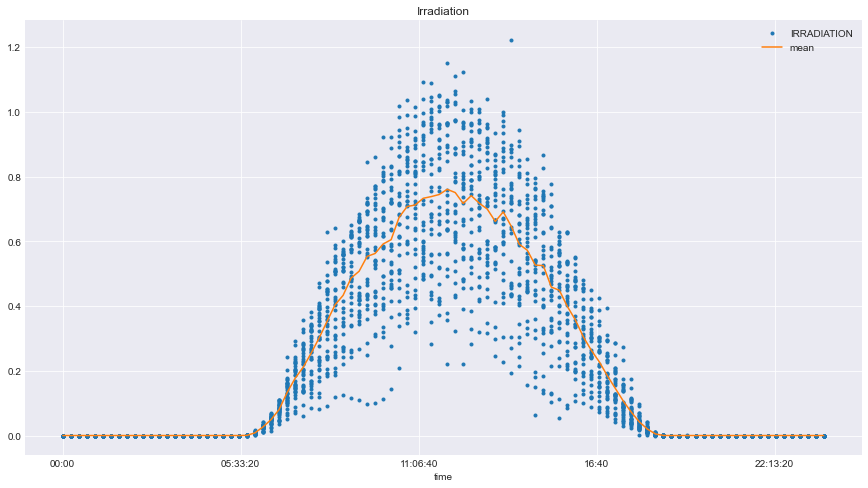

In [57]:
sensor_data_sum.plot(x='time', y='IRRADIATION', style='.', figsize=(15, 8))
sensor_data_sum.groupby('time')['IRRADIATION'].agg(
    'mean').plot(legend=True, label='mean')
plt.title('Irradiation')
plt.show()

In [58]:
irr = sensor_data_sum.pivot_table(
    values='IRRADIATION', index='time', columns='date')
irr

date      2020-05-15  2020-05-16  2020-05-17  2020-05-18  2020-05-19  \
time                                                                   
00:00:00         0.0         NaN         0.0         0.0         0.0   
00:15:00         0.0         NaN         0.0         0.0         0.0   
00:30:00         0.0         NaN         0.0         0.0         0.0   
00:45:00         0.0         NaN         0.0         0.0         0.0   
01:00:00         0.0         NaN         0.0         0.0         0.0   
...              ...         ...         ...         ...         ...   
22:45:00         0.0         0.0         0.0         0.0         0.0   
23:00:00         0.0         0.0         0.0         0.0         0.0   
23:15:00         NaN         0.0         0.0         0.0         0.0   
23:30:00         NaN         0.0         0.0         0.0         0.0   
23:45:00         NaN         0.0         0.0         0.0         0.0   

date      2020-05-20  2020-05-21  2020-05-22  2020-05-23  2020-05-24  ...  \
time                                                                  ...   
00:00:00         0.0         0.0         0.0         0.0         0.0  ...   
00:15:00         0.0         0.0         0.0         0.0         0.0  ...   
00:30:00         0.0         0.0         0.0         0.0         0.0  ...   
00:45:00         0.0         NaN         0.0         0.0         0.0  ...   
01:00:00         0.0         NaN         0.0         0.0         0.0  ...   
...              ...         ...         ...         ...         ...  ...   
22:45:00         0.0         0.0         0.0         0.0         0.0  ...   
23:00:00         0.0         0.0         0.0         0.0         0.0  ...   
23:15:00         0.0         0.0         0.0         0.0         0.0  ...   
23:30:00         0.0         0.0         0.0         0.0         0.0  ...   
23:45:00         0.0         0.0         0.0         0.0         0.0  ...   

date      2020-06-08  2020-06-09  2020-06-10  2020-06-11  2020-06-12  \
time                                                                   
00:00:00         0.0         0.0         0.0         0.0         0.0   
00:15:00         0.0         0.0         0.0         0.0         0.0   
00:30:00         0.0         0.0         0.0         0.0         0.0   
00:45:00         0.0         0.0         0.0         0.0         0.0   
01:00:00         0.0         0.0         0.0         0.0         0.0   
...              ...         ...         ...         ...         ...   
22:45:00         0.0         0.0         0.0         0.0         0.0   
23:00:00         0.0         0.0         0.0         0.0         0.0   
23:15:00         0.0         0.0         0.0         0.0         0.0   
23:30:00         0.0         0.0         0.0         0.0         0.0   
23:45:00         0.0         0.0         0.0         0.0         0.0   

date      2020-06-13  2020-06-14  2020-06-15  2020-06-16  2020-06-17  
time                                                                  
00:00:00         0.0         0.0         0.0         0.0         0.0  
00:15:00         0.0         0.0         0.0         0.0         0.0  
00:30:00         0.0         0.0         0.0         0.0         0.0  
00:45:00         0.0         0.0         0.0         0.0         0.0  
01:00:00         0.0         0.0         0.0         0.0         0.0  
...              ...         ...         ...         ...         ...  
22:45:00         0.0         0.0         0.0         0.0         0.0  
23:00:00         0.0         0.0         0.0         0.0         0.0  
23:15:00         0.0         0.0         0.0         0.0         0.0  
23:30:00         0.0         0.0         0.0         0.0         0.0  
23:45:00         0.0         0.0         0.0         0.0         0.0  

[96 rows x 34 columns]

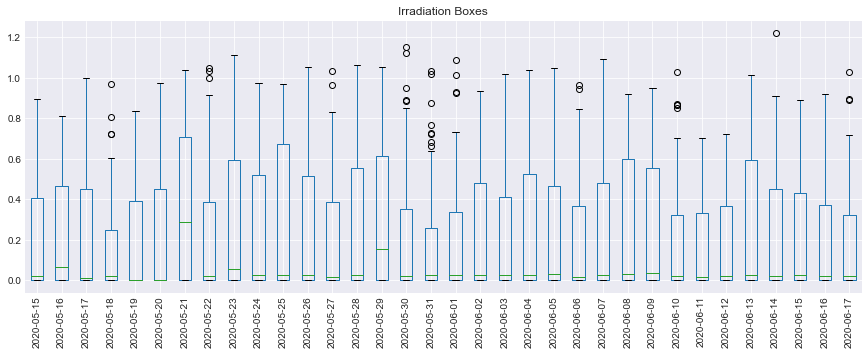

In [59]:
irr.boxplot(rot=90, figsize=(15, 5))
plt.title('Irradiation Boxes')
plt.show()

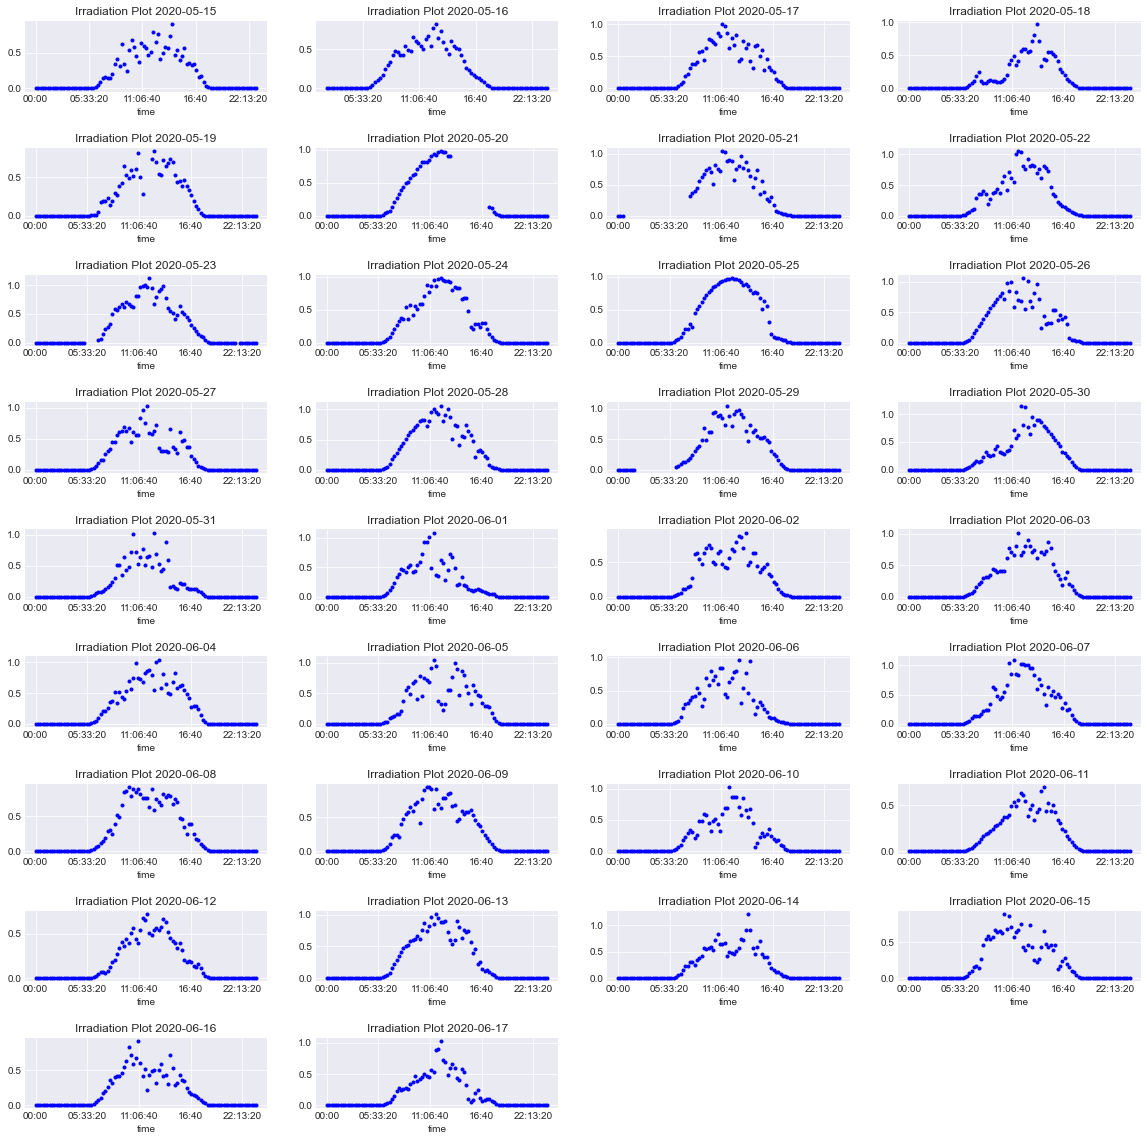

In [60]:
multi_plot(data=irr, row=9, col=4, title='Irradiation Plot')

In [61]:
irr_sum = sensor_data_sum.groupby('date')['IRRADIATION'].agg('sum')
irr_sum

date
2020-05-15    19.037010
2020-05-16    18.651690
2020-05-17    22.931378
2020-05-18    15.266485
2020-05-19    18.044861
2020-05-20    18.245542
2020-05-21    23.556170
2020-05-22    22.119123
2020-05-23    26.106652
2020-05-24    24.937180
2020-05-25    27.233366
2020-05-26    24.250589
2020-05-27    20.537566
2020-05-28    26.032384
2020-05-29    24.795661
2020-05-30    21.875054
2020-05-31    17.625458
2020-06-01    17.649244
2020-06-02    21.483649
2020-06-03    21.927709
2020-06-04    24.670974
2020-06-05    23.192659
2020-06-06    19.526878
2020-06-07    24.402373
2020-06-08    25.315527
2020-06-09    24.754673
2020-06-10    19.232292
2020-06-11    15.533706
2020-06-12    16.301551
2020-06-13    25.389355
2020-06-14    21.128221
2020-06-15    19.768806
2020-06-16    17.979125
2020-06-17    16.988513
Name: IRRADIATION, dtype: float64

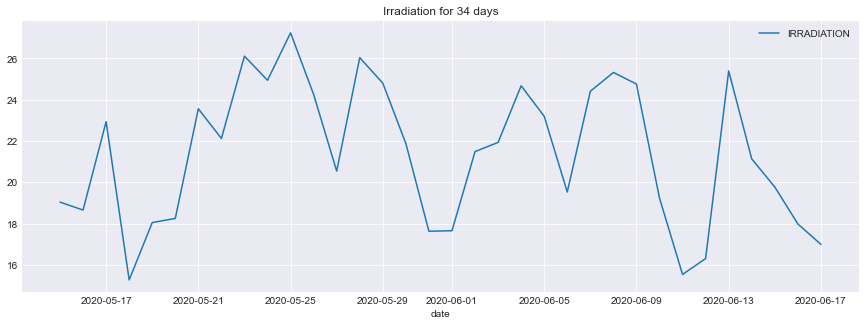

In [62]:
irr_sum.plot(legend=True, figsize=(15, 5))
plt.title('Irradiation for 34 days')
plt.show()

## Data Correlation

In [63]:
plant1_sum

DC_POWER  AC_POWER    DAILY_YIELD  TOTAL_YIELD  Year  Month  Day  Hour  \
0          0.0       0.0    5407.250000  153519480.0  2020      1    6     0   
1          0.0       0.0       0.000000  153519480.0  2020      1    6     0   
2          0.0       0.0       0.000000  153519480.0  2020      1    6     0   
3          0.0       0.0       0.000000  153519480.0  2020      1    6     0   
4          0.0       0.0       0.000000  153519480.0  2020      1    6     1   
...        ...       ...            ...          ...   ...    ...  ...   ...   
3153       0.0       0.0  125291.000000  153519480.0  2020      5   31    22   
3154       0.0       0.0  125291.000000  153519480.0  2020      5   31    23   
3155       0.0       0.0  125291.000000  153519480.0  2020      5   31    23   
3156       0.0       0.0  125291.000000  153519480.0  2020      5   31    23   
3157       0.0       0.0  113737.142857  153519480.0  2020      5   31    23   

      Minute  DayOfWeek  DayOfYear      time        date  
0          0          0          6  00:00:00  2020-01-06  
1         15          0          6  00:15:00  2020-01-06  
2         30          0          6  00:30:00  2020-01-06  
3         45          0          6  00:45:00  2020-01-06  
4          0          0          6  01:00:00  2020-01-06  
...      ...        ...        ...       ...         ...  
3153      45          6        152  22:45:00  2020-05-31  
3154       0          6        152  23:00:00  2020-05-31  
3155      15          6        152  23:15:00  2020-05-31  
3156      30          6        152  23:30:00  2020-05-31  
3157      45          6        152  23:45:00  2020-05-31  

[3158 rows x 13 columns]

In [64]:
sensor_data_sum

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0    2020-05-15 00:00:00            25.184316           22.857507   
1    2020-05-15 00:15:00            25.084589           22.761668   
2    2020-05-15 00:30:00            24.935753           22.592306   
3    2020-05-15 00:45:00            24.846130           22.360852   
4    2020-05-15 01:00:00            24.621525           22.165423   
...                  ...                  ...                 ...   
3177 2020-06-17 22:45:00            22.150570           21.480377   
3178 2020-06-17 23:00:00            22.129816           21.389024   
3179 2020-06-17 23:15:00            22.008275           20.709211   
3180 2020-06-17 23:30:00            21.969495           20.734963   
3181 2020-06-17 23:45:00            21.909288           20.427972   

      IRRADIATION      time        date  
0             0.0  00:00:00  2020-05-15  
1             0.0  00:15:00  2020-05-15  
2             0.0  00:30:00  2020-05-15  
3             0.0  00:45:00  2020-05-15  
4             0.0  01:00:00  2020-05-15  
...           ...       ...         ...  
3177          0.0  22:45:00  2020-06-17  
3178          0.0  23:00:00  2020-06-17  
3179          0.0  23:15:00  2020-06-17  
3180          0.0  23:30:00  2020-06-17  
3181          0.0  23:45:00  2020-06-17  

[3182 rows x 6 columns]

In [65]:
power_sensor = sensor_data_sum.merge(plant1_sum)
power_sensor

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0    2020-05-15 00:00:00            25.184316           22.857507   
1    2020-05-15 00:15:00            25.084589           22.761668   
2    2020-05-15 00:30:00            24.935753           22.592306   
3    2020-05-15 00:45:00            24.846130           22.360852   
4    2020-05-15 01:00:00            24.621525           22.165423   
...                  ...                  ...                 ...   
2097 2020-06-17 22:45:00            22.150570           21.480377   
2098 2020-06-17 23:00:00            22.129816           21.389024   
2099 2020-06-17 23:15:00            22.008275           20.709211   
2100 2020-06-17 23:30:00            21.969495           20.734963   
2101 2020-06-17 23:45:00            21.909288           20.427972   

      IRRADIATION      time        date  DC_POWER  AC_POWER    DAILY_YIELD  \
0             0.0  00:00:00  2020-05-15       0.0       0.0       0.000000   
1             0.0  00:15:00  2020-05-15       0.0       0.0       0.000000   
2             0.0  00:30:00  2020-05-15       0.0       0.0       0.000000   
3             0.0  00:45:00  2020-05-15       0.0       0.0       0.000000   
4             0.0  01:00:00  2020-05-15       0.0       0.0       0.000000   
...           ...       ...         ...       ...       ...            ...   
2097          0.0  22:45:00  2020-06-17       0.0       0.0  129571.000000   
2098          0.0  23:00:00  2020-06-17       0.0       0.0  129571.000000   
2099          0.0  23:15:00  2020-06-17       0.0       0.0  129571.000000   
2100          0.0  23:30:00  2020-06-17       0.0       0.0  129571.000000   
2101          0.0  23:45:00  2020-06-17       0.0       0.0  127962.767857   

      TOTAL_YIELD  Year  Month  Day  Hour  Minute  DayOfWeek  DayOfYear  
0     143581676.0  2020      5   15     0       0          4        136  
1     143581676.0  2020      5   15     0      15          4        136  
2     143581676.0  2020      5   15     0      30          4        136  
3     143581676.0  2020      5   15     0      45          4        136  
4     150761642.0  2020      5   15     1       0          4        136  
...           ...   ...    ...  ...   ...     ...        ...        ...  
2097  156142755.0  2020      6   17    22      45          2        169  
2098  156142755.0  2020      6   17    23       0          2        169  
2099  156142755.0  2020      6   17    23      15          2        169  
2100  156142755.0  2020      6   17    23      30          2        169  
2101  156142755.0  2020      6   17    23      45          2        169  

[2102 rows x 17 columns]

In [66]:
power_sensor.drop(columns=['Year', 'Month', 'Minute',
                           'DayOfWeek', 'DayOfYear', 'Day', 'Hour', 'time', 'date'], axis=1, inplace=True)
power_sensor

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0    2020-05-15 00:00:00            25.184316           22.857507   
1    2020-05-15 00:15:00            25.084589           22.761668   
2    2020-05-15 00:30:00            24.935753           22.592306   
3    2020-05-15 00:45:00            24.846130           22.360852   
4    2020-05-15 01:00:00            24.621525           22.165423   
...                  ...                  ...                 ...   
2097 2020-06-17 22:45:00            22.150570           21.480377   
2098 2020-06-17 23:00:00            22.129816           21.389024   
2099 2020-06-17 23:15:00            22.008275           20.709211   
2100 2020-06-17 23:30:00            21.969495           20.734963   
2101 2020-06-17 23:45:00            21.909288           20.427972   

      IRRADIATION  DC_POWER  AC_POWER    DAILY_YIELD  TOTAL_YIELD  
0             0.0       0.0       0.0       0.000000  143581676.0  
1             0.0       0.0       0.0       0.000000  143581676.0  
2             0.0       0.0       0.0       0.000000  143581676.0  
3             0.0       0.0       0.0       0.000000  143581676.0  
4             0.0       0.0       0.0       0.000000  150761642.0  
...           ...       ...       ...            ...          ...  
2097          0.0       0.0       0.0  129571.000000  156142755.0  
2098          0.0       0.0       0.0  129571.000000  156142755.0  
2099          0.0       0.0       0.0  129571.000000  156142755.0  
2100          0.0       0.0       0.0  129571.000000  156142755.0  
2101          0.0       0.0       0.0  127962.767857  156142755.0  

[2102 rows x 8 columns]

In [67]:
power_sensor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2102 entries, 0 to 2101
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            2102 non-null   datetime64[ns]
 1   AMBIENT_TEMPERATURE  2102 non-null   float64       
 2   MODULE_TEMPERATURE   2102 non-null   float64       
 3   IRRADIATION          2102 non-null   float64       
 4   DC_POWER             2102 non-null   float64       
 5   AC_POWER             2102 non-null   float64       
 6   DAILY_YIELD          2102 non-null   float64       
 7   TOTAL_YIELD          2102 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 147.8 KB


In [68]:
from pandas_profiling import ProfileReport
prof = ProfileReport(power_sensor)
prof

In [69]:
power_sensor.corr(method='spearman')

AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  \
AMBIENT_TEMPERATURE             1.000000            0.904966     0.727792   
MODULE_TEMPERATURE              0.904966            1.000000     0.898463   
IRRADIATION                     0.727792            0.898463     1.000000   
DC_POWER                        0.726844            0.899742     0.991862   
AC_POWER                        0.726807            0.899723     0.991859   
DAILY_YIELD                     0.561756            0.395577     0.214140   
TOTAL_YIELD                    -0.145263           -0.037379     0.019198   

                     DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  
AMBIENT_TEMPERATURE  0.726844  0.726807     0.561756    -0.145263  
MODULE_TEMPERATURE   0.899742  0.899723     0.395577    -0.037379  
IRRADIATION          0.991862  0.991859     0.214140     0.019198  
DC_POWER             1.000000  1.000000     0.215899     0.028539  
AC_POWER             1.000000  1.000000     0.215875     0.028532  
DAILY_YIELD          0.215899  0.215875     1.000000     0.041595  
TOTAL_YIELD          0.028539  0.028532     0.041595     1.000000

In [70]:
corr = power_sensor.drop(
    columns=['DAILY_YIELD', 'TOTAL_YIELD'], axis=1).corr(method='spearman')
corr

AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  \
AMBIENT_TEMPERATURE             1.000000            0.904966     0.727792   
MODULE_TEMPERATURE              0.904966            1.000000     0.898463   
IRRADIATION                     0.727792            0.898463     1.000000   
DC_POWER                        0.726844            0.899742     0.991862   
AC_POWER                        0.726807            0.899723     0.991859   

                     DC_POWER  AC_POWER  
AMBIENT_TEMPERATURE  0.726844  0.726807  
MODULE_TEMPERATURE   0.899742  0.899723  
IRRADIATION          0.991862  0.991859  
DC_POWER             1.000000  1.000000  
AC_POWER             1.000000  1.000000

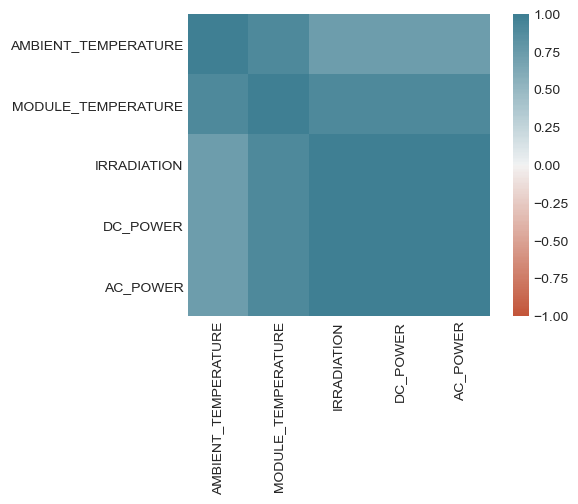

In [71]:
import seaborn as sns
plt.figure(dpi=100)
sns.heatmap(corr, vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200),
            square=True)
plt.show()

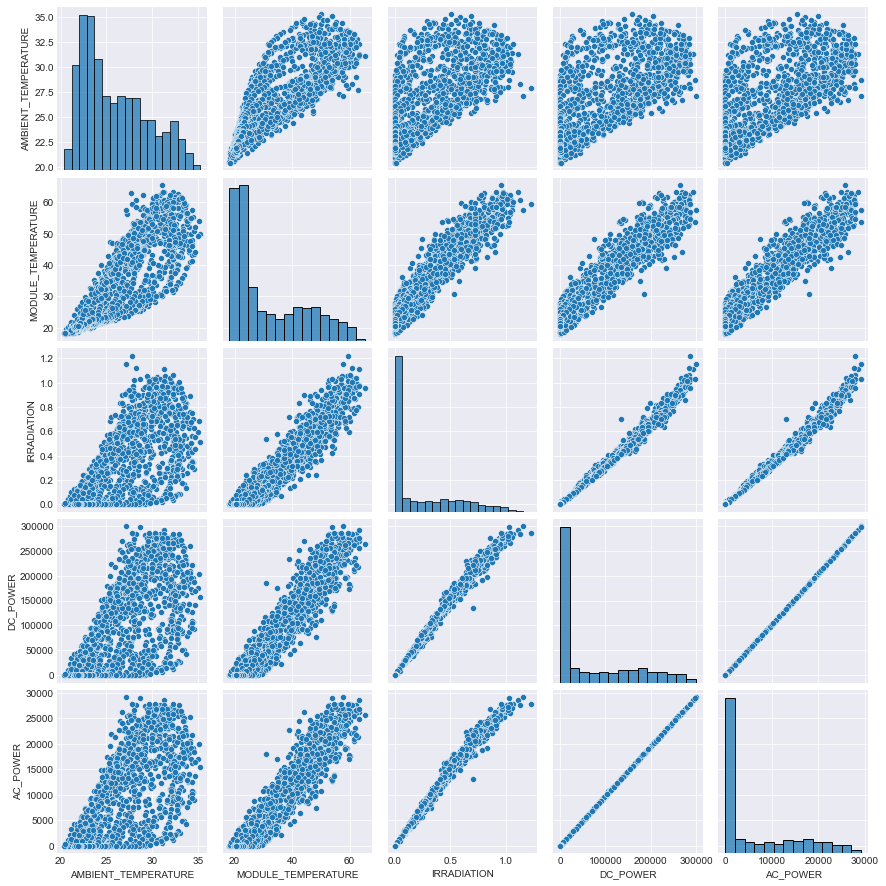

In [72]:
sns.pairplot(power_sensor.drop(
    columns=['DAILY_YIELD', 'TOTAL_YIELD'], axis=1))
plt.show()

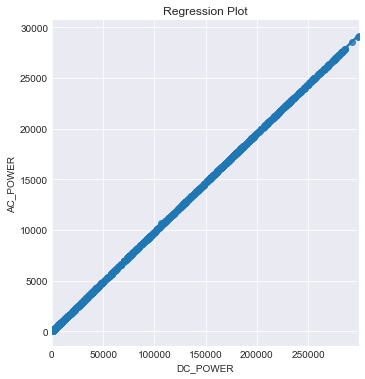

In [73]:
sns.lmplot(x='DC_POWER', y='AC_POWER', data=power_sensor)
plt.title('Regression Plot')
plt.show()

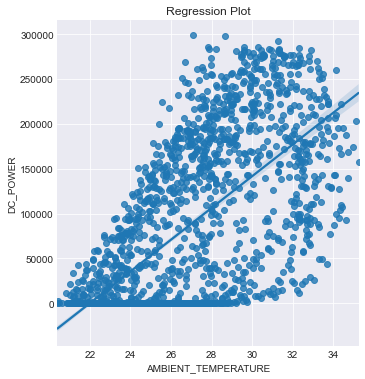

In [74]:
sns.lmplot(x='AMBIENT_TEMPERATURE', y='DC_POWER', data=power_sensor)
plt.title('Regression Plot')
plt.show()

In [75]:
power_sensor

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0    2020-05-15 00:00:00            25.184316           22.857507   
1    2020-05-15 00:15:00            25.084589           22.761668   
2    2020-05-15 00:30:00            24.935753           22.592306   
3    2020-05-15 00:45:00            24.846130           22.360852   
4    2020-05-15 01:00:00            24.621525           22.165423   
...                  ...                  ...                 ...   
2097 2020-06-17 22:45:00            22.150570           21.480377   
2098 2020-06-17 23:00:00            22.129816           21.389024   
2099 2020-06-17 23:15:00            22.008275           20.709211   
2100 2020-06-17 23:30:00            21.969495           20.734963   
2101 2020-06-17 23:45:00            21.909288           20.427972   

      IRRADIATION  DC_POWER  AC_POWER    DAILY_YIELD  TOTAL_YIELD  
0             0.0       0.0       0.0       0.000000  143581676.0  
1             0.0       0.0       0.0       0.000000  143581676.0  
2             0.0       0.0       0.0       0.000000  143581676.0  
3             0.0       0.0       0.0       0.000000  143581676.0  
4             0.0       0.0       0.0       0.000000  150761642.0  
...           ...       ...       ...            ...          ...  
2097          0.0       0.0       0.0  129571.000000  156142755.0  
2098          0.0       0.0       0.0  129571.000000  156142755.0  
2099          0.0       0.0       0.0  129571.000000  156142755.0  
2100          0.0       0.0       0.0  129571.000000  156142755.0  
2101          0.0       0.0       0.0  127962.767857  156142755.0  

[2102 rows x 8 columns]

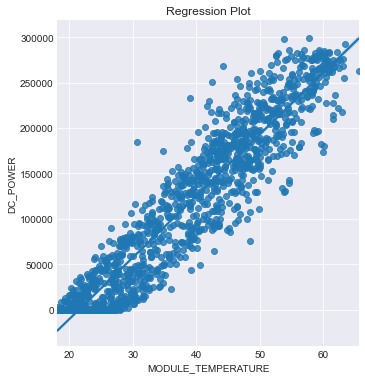

In [76]:
sns.lmplot(x='MODULE_TEMPERATURE', y='DC_POWER', data=power_sensor)
plt.title('Regression Plot')
plt.show()

In [77]:
def power_lmplot(x=None, y=None, Title='Regression Plot'):
    sns.lmplot(x, y, data=power_sensor)
    plt.title(Title)
    plt.show()

C:\Users\nrpra\ML_project\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


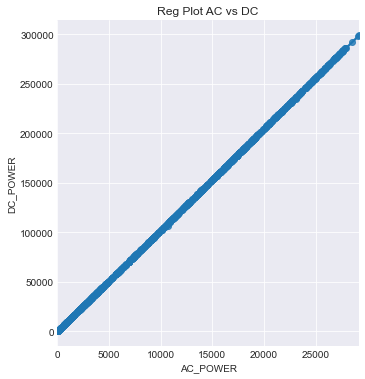

In [78]:
power_lmplot('AC_POWER', 'DC_POWER', Title='Reg Plot AC vs DC')

C:\Users\nrpra\ML_project\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


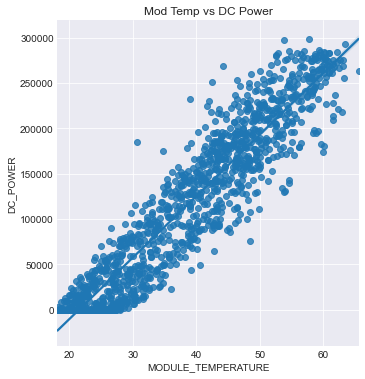

In [79]:
power_lmplot('MODULE_TEMPERATURE', 'DC_POWER', Title='Mod Temp vs DC Power')

C:\Users\nrpra\ML_project\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


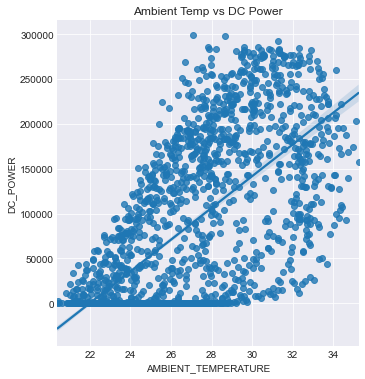

In [80]:
power_lmplot('AMBIENT_TEMPERATURE', 'DC_POWER',
             Title='Ambient Temp vs DC Power')

C:\Users\nrpra\ML_project\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


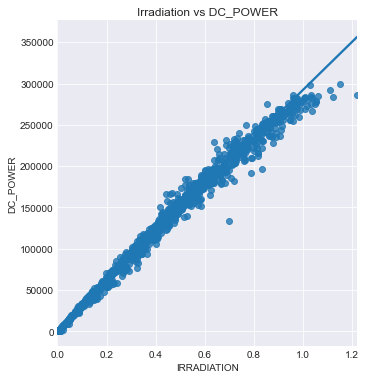

In [81]:
power_lmplot('IRRADIATION', 'DC_POWER', Title='Irradiation vs DC_POWER')

In [82]:
abs(power_sensor.AMBIENT_TEMPERATURE -
    power_sensor.MODULE_TEMPERATURE).value_counts()

2.572645     1
24.734227    1
1.823519     1
3.320451     1
2.351644     1
            ..
15.184509    1
1.348316     1
4.266831     1
2.988542     1
22.037577    1
Length: 2102, dtype: int64

In [83]:
power_sensor['Delta Temperature'] = abs(
    power_sensor.AMBIENT_TEMPERATURE - power_sensor.MODULE_TEMPERATURE)
power_sensor

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0    2020-05-15 00:00:00            25.184316           22.857507   
1    2020-05-15 00:15:00            25.084589           22.761668   
2    2020-05-15 00:30:00            24.935753           22.592306   
3    2020-05-15 00:45:00            24.846130           22.360852   
4    2020-05-15 01:00:00            24.621525           22.165423   
...                  ...                  ...                 ...   
2097 2020-06-17 22:45:00            22.150570           21.480377   
2098 2020-06-17 23:00:00            22.129816           21.389024   
2099 2020-06-17 23:15:00            22.008275           20.709211   
2100 2020-06-17 23:30:00            21.969495           20.734963   
2101 2020-06-17 23:45:00            21.909288           20.427972   

      IRRADIATION  DC_POWER  AC_POWER    DAILY_YIELD  TOTAL_YIELD  \
0             0.0       0.0       0.0       0.000000  143581676.0   
1             0.0       0.0       0.0       0.000000  143581676.0   
2             0.0       0.0       0.0       0.000000  143581676.0   
3             0.0       0.0       0.0       0.000000  143581676.0   
4             0.0       0.0       0.0       0.000000  150761642.0   
...           ...       ...       ...            ...          ...   
2097          0.0       0.0       0.0  129571.000000  156142755.0   
2098          0.0       0.0       0.0  129571.000000  156142755.0   
2099          0.0       0.0       0.0  129571.000000  156142755.0   
2100          0.0       0.0       0.0  129571.000000  156142755.0   
2101          0.0       0.0       0.0  127962.767857  156142755.0   

      Delta Temperature  
0              2.326809  
1              2.322921  
2              2.343447  
3              2.485278  
4              2.456103  
...                 ...  
2097           0.670192  
2098           0.740792  
2099           1.299063  
2100           1.234532  
2101           1.481315  

[2102 rows x 9 columns]

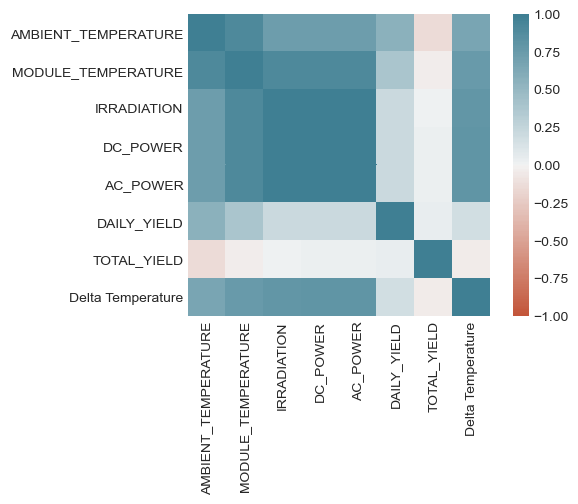

In [84]:
plt.figure(dpi=100)
sns.heatmap(power_sensor.corr(method='spearman'), vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200),
            square=True)
plt.show()

C:\Users\nrpra\ML_project\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


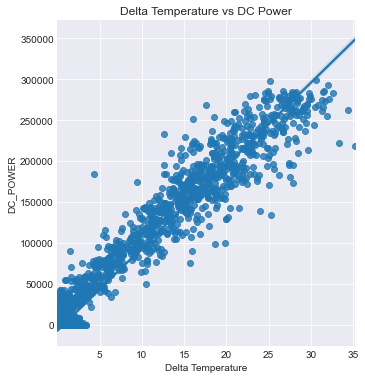

In [85]:
power_lmplot('Delta Temperature', 'DC_POWER',
             Title='Delta Temperature vs DC Power')

C:\Users\nrpra\ML_project\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


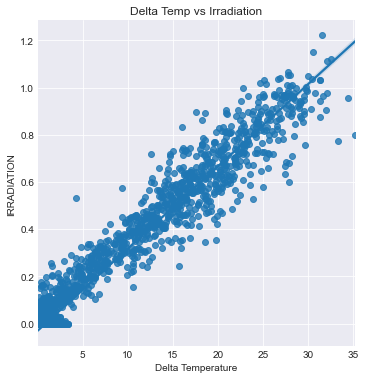

In [86]:
power_lmplot('Delta Temperature', 'IRRADIATION',
             Title='Delta Temp vs Irradiation')

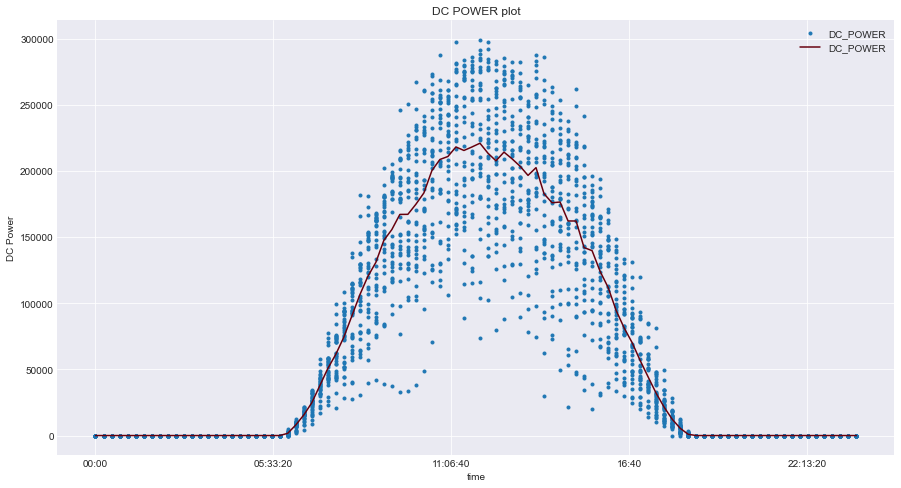

In [87]:
plant1_sum.plot(x='time', y='DC_POWER', style='.', figsize=(15, 8))
plant1_sum.groupby('time')['DC_POWER'].agg(
    'mean').plot(legend=True, colormap='Reds_r')
plt.ylabel('DC Power')
plt.title('DC POWER plot')
plt.show()

In [88]:
plant1_sum

DC_POWER  AC_POWER    DAILY_YIELD  TOTAL_YIELD  Year  Month  Day  Hour  \
0          0.0       0.0    5407.250000  153519480.0  2020      1    6     0   
1          0.0       0.0       0.000000  153519480.0  2020      1    6     0   
2          0.0       0.0       0.000000  153519480.0  2020      1    6     0   
3          0.0       0.0       0.000000  153519480.0  2020      1    6     0   
4          0.0       0.0       0.000000  153519480.0  2020      1    6     1   
...        ...       ...            ...          ...   ...    ...  ...   ...   
3153       0.0       0.0  125291.000000  153519480.0  2020      5   31    22   
3154       0.0       0.0  125291.000000  153519480.0  2020      5   31    23   
3155       0.0       0.0  125291.000000  153519480.0  2020      5   31    23   
3156       0.0       0.0  125291.000000  153519480.0  2020      5   31    23   
3157       0.0       0.0  113737.142857  153519480.0  2020      5   31    23   

      Minute  DayOfWeek  DayOfYear      time        date  
0          0          0          6  00:00:00  2020-01-06  
1         15          0          6  00:15:00  2020-01-06  
2         30          0          6  00:30:00  2020-01-06  
3         45          0          6  00:45:00  2020-01-06  
4          0          0          6  01:00:00  2020-01-06  
...      ...        ...        ...       ...         ...  
3153      45          6        152  22:45:00  2020-05-31  
3154       0          6        152  23:00:00  2020-05-31  
3155      15          6        152  23:15:00  2020-05-31  
3156      30          6        152  23:30:00  2020-05-31  
3157      45          6        152  23:45:00  2020-05-31  

[3158 rows x 13 columns]